# Muesli Data Analysis

## Pre-Setup

### Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("magma")

### Read in data

In [2]:
df_orders = pd.read_excel("./data/Muesli Project raw data.xlsx",sheet_name="Orders",header=1)
df_campaign = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="Campaign Data")
df_order_process = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="Order Process Data")
df_interndata = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="InternData Study")

### Raw dataframes

In [3]:
#df_orders.head(2)

In [4]:
#df_campaign.head(2)

In [5]:
#df_order_process.head(2)

In [6]:
#df_interndata.head(2)

### Data cleaning function

In [7]:
def data_cleaning(df, df_type):
    
    # make col names lower
    df.columns = df.columns.str.lower()

    
    # orders data
    if df_type == "orders":
        # dropping cols
        df = df.drop(["index", "customer name", "origin channel", "category", "sub-category", "product id", "sales", "quantity", "discount", "profit"],axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # renaming values in ship mode
        df["ship mode"] = df["ship mode"].str.replace(" Class","")
        df["ship mode"] = df["ship mode"].str.replace("Second","Standard")
        df["ship mode"] = df["ship mode"].str.replace("First","Express")
    
    # campaign data
    elif df_type == "campaign":
        # dropping cols
        df = df.drop("customer name", axis=1)
        # dropping duplicates
        pass

    # order process data    
    elif df_type == "order_process":
        # dropping cols
        df = df.drop("row id", axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping 1 duplicate row for id (scanned on truck twice)
        df = df.drop_duplicates(subset=["order id"], keep = "first")
        # dropping column order date, because 100% match with order date in orders data
        df = df.drop("order date", axis=1)
        # dropping column ship mode, because 100% match with ship mode in orders data (assumption: second class shipping = standard)
        df = df.drop("ship mode", axis=1)


    #intern data
    else:
        # dropping cols
        pass
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping column pickup date, because 100% match with on truck scan date
        df = df.drop("pickup date", axis=1)

    

    return df

### Checks for cleaning function

#### Orders data

In [8]:
df_orders_1 = data_cleaning(df_orders,"orders")
df_orders_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central
2,CA-2019-169194,2019-06-20,Standard,LH-16900,United States,Dover,Delaware,19901.0,East
3,CA-2019-111682,2019-06-17,Express,TB-21055,United States,Troy,New York,12180.0,East
4,CA-2018-135545,2018-11-24,Standard,KM-16720,United States,Los Angeles,California,90004.0,West
...,...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard,SF-20965,United States,San Francisco,California,94109.0,West
9980,US-2017-114377,2017-11-05,Express,BG-11035,United States,Hampton,Virginia,23666.0,South
9984,CA-2020-107209,2020-07-27,Standard,JW-15955,United States,Raleigh,North Carolina,27604.0,South
9986,US-2020-152842,2020-07-16,Standard,NF-18385,United States,Charlotte,North Carolina,28205.0,South


In [9]:
df_orders_1.duplicated().value_counts()

False    5009
Name: count, dtype: int64

In [10]:
df_orders_1["order id"].nunique()

5009

In [11]:
df_orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order id        5009 non-null   object        
 1   order date      5009 non-null   datetime64[ns]
 2   ship mode       5009 non-null   object        
 3   customer id     5009 non-null   object        
 4   country/region  5009 non-null   object        
 5   city            5009 non-null   object        
 6   state           5009 non-null   object        
 7   postal code     5003 non-null   float64       
 8   region          5009 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 391.3+ KB


#### Campaign data

In [12]:
df_campaign_1 = data_cleaning(df_campaign,"campaign")
df_campaign_1

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


In [13]:
df_campaign_1.duplicated().value_counts()

False    333
Name: count, dtype: int64

In [14]:
df_campaign_1["order id"].nunique()

333

In [15]:
df_campaign_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order id           333 non-null    object        
 1   arrival scan date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


#### Order process data

In [16]:
df_order_process_1 = data_cleaning(df_order_process,"order_process")
df_order_process_1

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [17]:
df_order_process_1.duplicated().value_counts()

False    3002
Name: count, dtype: int64

In [18]:
df_order_process_1["order id"].duplicated().value_counts()

order id
False    3002
Name: count, dtype: int64

In [19]:
df_order_process_1.drop_duplicates("order id")


,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [20]:
duplicates = df_order_process_1[df_order_process_1["order id"].duplicated(keep=False)]
duplicates

,order id,on truck scan date


In [21]:
df_order_process_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            3002 non-null   object        
 1   on truck scan date  3002 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 70.4+ KB


#### Intern data

In [22]:
df_interndata_1 = data_cleaning(df_interndata,"intern")
df_interndata_1

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
...,...,...
283,US-2020-165456,2020-12-03
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
288,CA-2020-119305,2020-12-04


In [23]:
df_interndata_1.duplicated().value_counts()

False    204
Name: count, dtype: int64

In [24]:
df_interndata_1["order id"].duplicated().value_counts()

order id
False    204
Name: count, dtype: int64

In [25]:
df_interndata_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            204 non-null    object        
 1   ready to ship date  204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


#### Truck scan vs intern scan

In [26]:
#merged_truck = df_order_process_1.merge(df_interndata_1, on="order id", how="outer")
#merged_truck = merged_truck[["order id","on truck scan date","pickup date"]].dropna()
#merged_truck

In [27]:
#merged_truck["diff"] = merged_truck["on truck scan date"] - merged_truck["pickup date"]
#merged_truck

#### Order dates & shipping methods

In [28]:
#merged_op = df_orders_1.merge(df_order_process_1, on="order id", how="outer").dropna()

In [29]:
#merged_op[["order id","order date_x","ship mode_x","order date_y","ship mode_y"]]
#merged_op["date_diff"] = merged_op["order date_x"]-merged_op["order date_y"]
#merged_op["date_diff"].value_counts()

In [30]:
#merged_op

In [31]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [32]:
#merged_op["ship mode_x"].value_counts()

In [33]:
#merged_op["ship mode_y"].value_counts()

In [34]:
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace(" Class","")
#merged_op["ship mode_y"] = merged_op["ship mode_y"].str.replace(" Processing","")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("Second","Standard")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("First","Express")

In [35]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [36]:
#merged_op['match'] = merged_op['ship mode_x'] == merged_op['ship mode_y']
#merged_op['match'].value_counts()

## Cleaned dataframes

In [37]:
df_orders_cleaned = data_cleaning(df_orders,"orders")
df_campaign_cleaned = data_cleaning(df_campaign,"campaign")
df_order_process_cleaned = data_cleaning(df_order_process,"order_process")
df_interndata_cleaned = data_cleaning(df_interndata,"intern")

In [38]:
df_orders_cleaned

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central
2,CA-2019-169194,2019-06-20,Standard,LH-16900,United States,Dover,Delaware,19901.0,East
3,CA-2019-111682,2019-06-17,Express,TB-21055,United States,Troy,New York,12180.0,East
4,CA-2018-135545,2018-11-24,Standard,KM-16720,United States,Los Angeles,California,90004.0,West
...,...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard,SF-20965,United States,San Francisco,California,94109.0,West
9980,US-2017-114377,2017-11-05,Express,BG-11035,United States,Hampton,Virginia,23666.0,South
9984,CA-2020-107209,2020-07-27,Standard,JW-15955,United States,Raleigh,North Carolina,27604.0,South
9986,US-2020-152842,2020-07-16,Standard,NF-18385,United States,Charlotte,North Carolina,28205.0,South


In [39]:
df_campaign_cleaned

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


In [40]:
df_order_process_cleaned

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [41]:
df_interndata_cleaned

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
...,...,...
283,US-2020-165456,2020-12-03
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
288,CA-2020-119305,2020-12-04


## Metrics

### o_date_2_processed

In [42]:
merged_metric_1 = df_orders_cleaned.merge(df_interndata_cleaned, on="order id", how="outer").dropna()
merged_metric_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region,ready to ship date
1703,CA-2019-100244,2019-09-20,Standard,GM-14695,United States,San Francisco,California,94122.0,West,2019-09-24
1711,CA-2019-100944,2019-09-24,Standard,EH-13765,United States,Los Angeles,California,90049.0,West,2019-09-30
1740,CA-2019-102162,2019-09-11,Standard,JF-15565,United States,Newport News,Virginia,23602.0,South,2019-09-16
1747,CA-2019-102932,2019-09-19,Standard,SD-20485,United States,Orange,New Jersey,7050.0,East,2019-09-23
1748,CA-2019-102981,2019-09-06,Standard,MO-17500,United States,New York City,New York,10035.0,East,2019-09-09
...,...,...,...,...,...,...,...,...,...,...
4984,US-2020-163790,2020-11-02,Standard,NL-18310,United States,Danville,California,94526.0,West,2020-11-04
4987,US-2020-165344,2020-11-13,Express,SB-20290,United States,Springfield,Ohio,45503.0,East,2020-11-16
4989,US-2020-165456,2020-11-30,Express,TB-21625,United States,Philadelphia,Pennsylvania,19134.0,East,2020-12-03
5001,US-2020-168116,2020-11-04,Express,GT-14635,United States,Burlington,North Carolina,27217.0,South,2020-11-04


In [43]:
merged_metric_1["date_diff"] = merged_metric_1["ready to ship date"]-merged_metric_1["order date"]
merged_metric_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region,ready to ship date,date_diff
1703,CA-2019-100244,2019-09-20,Standard,GM-14695,United States,San Francisco,California,94122.0,West,2019-09-24,4 days
1711,CA-2019-100944,2019-09-24,Standard,EH-13765,United States,Los Angeles,California,90049.0,West,2019-09-30,6 days
1740,CA-2019-102162,2019-09-11,Standard,JF-15565,United States,Newport News,Virginia,23602.0,South,2019-09-16,5 days
1747,CA-2019-102932,2019-09-19,Standard,SD-20485,United States,Orange,New Jersey,7050.0,East,2019-09-23,4 days
1748,CA-2019-102981,2019-09-06,Standard,MO-17500,United States,New York City,New York,10035.0,East,2019-09-09,3 days
...,...,...,...,...,...,...,...,...,...,...,...
4984,US-2020-163790,2020-11-02,Standard,NL-18310,United States,Danville,California,94526.0,West,2020-11-04,2 days
4987,US-2020-165344,2020-11-13,Express,SB-20290,United States,Springfield,Ohio,45503.0,East,2020-11-16,3 days
4989,US-2020-165456,2020-11-30,Express,TB-21625,United States,Philadelphia,Pennsylvania,19134.0,East,2020-12-03,3 days
5001,US-2020-168116,2020-11-04,Express,GT-14635,United States,Burlington,North Carolina,27217.0,South,2020-11-04,0 days


In [44]:
merged_metric_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1703 to 5004
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            204 non-null    object         
 1   order date          204 non-null    datetime64[ns] 
 2   ship mode           204 non-null    object         
 3   customer id         204 non-null    object         
 4   country/region      204 non-null    object         
 5   city                204 non-null    object         
 6   state               204 non-null    object         
 7   postal code         204 non-null    float64        
 8   region              204 non-null    object         
 9   ready to ship date  204 non-null    datetime64[ns] 
 10  date_diff           204 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(7), timedelta64[ns](1)
memory usage: 19.1+ KB


In [45]:
merged_metric_1["date_diff_days"] = merged_metric_1["date_diff"].dt.days

In [46]:
merged_metric_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1703 to 5004
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            204 non-null    object         
 1   order date          204 non-null    datetime64[ns] 
 2   ship mode           204 non-null    object         
 3   customer id         204 non-null    object         
 4   country/region      204 non-null    object         
 5   city                204 non-null    object         
 6   state               204 non-null    object         
 7   postal code         204 non-null    float64        
 8   region              204 non-null    object         
 9   ready to ship date  204 non-null    datetime64[ns] 
 10  date_diff           204 non-null    timedelta64[ns]
 11  date_diff_days      204 non-null    int64          
dtypes: datetime64[ns](2), float64(1), int64(1), object(7), timedelta64[ns](1)
memory usage: 20.7+

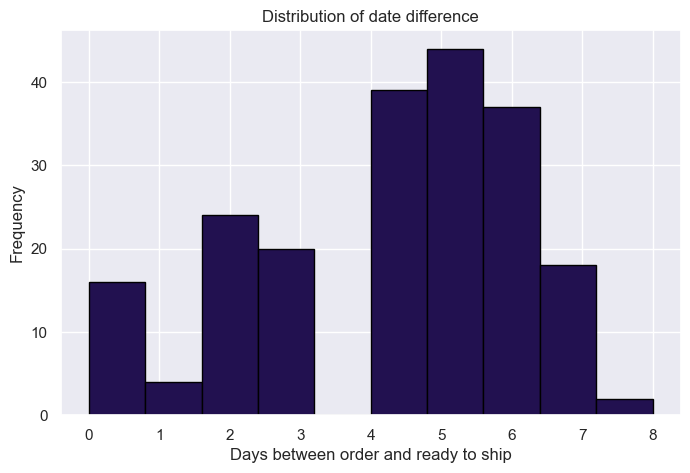

In [47]:
# 1. Distribution of date_diff
plt.figure(figsize=(8,5))
plt.hist(merged_metric_1["date_diff_days"], edgecolor="black")
plt.title("Distribution of date difference")
plt.xlabel("Days between order and ready to ship")
plt.ylabel("Frequency")
plt.show()

#### WEEKDAYS

In [48]:
# Order weekday (0=Monday, 6=Sunday)
merged_metric_1["order_weekday"] = merged_metric_1["order date"].dt.day_name()

# Ready-to-ship weekday
merged_metric_1["ship_weekday"] = merged_metric_1["ready to ship date"].dt.day_name()

In [49]:
merged_metric_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region,ready to ship date,date_diff,date_diff_days,order_weekday,ship_weekday
1703,CA-2019-100244,2019-09-20,Standard,GM-14695,United States,San Francisco,California,94122.0,West,2019-09-24,4 days,4,Friday,Tuesday
1711,CA-2019-100944,2019-09-24,Standard,EH-13765,United States,Los Angeles,California,90049.0,West,2019-09-30,6 days,6,Tuesday,Monday
1740,CA-2019-102162,2019-09-11,Standard,JF-15565,United States,Newport News,Virginia,23602.0,South,2019-09-16,5 days,5,Wednesday,Monday
1747,CA-2019-102932,2019-09-19,Standard,SD-20485,United States,Orange,New Jersey,7050.0,East,2019-09-23,4 days,4,Thursday,Monday
1748,CA-2019-102981,2019-09-06,Standard,MO-17500,United States,New York City,New York,10035.0,East,2019-09-09,3 days,3,Friday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,US-2020-163790,2020-11-02,Standard,NL-18310,United States,Danville,California,94526.0,West,2020-11-04,2 days,2,Monday,Wednesday
4987,US-2020-165344,2020-11-13,Express,SB-20290,United States,Springfield,Ohio,45503.0,East,2020-11-16,3 days,3,Friday,Monday
4989,US-2020-165456,2020-11-30,Express,TB-21625,United States,Philadelphia,Pennsylvania,19134.0,East,2020-12-03,3 days,3,Monday,Thursday
5001,US-2020-168116,2020-11-04,Express,GT-14635,United States,Burlington,North Carolina,27217.0,South,2020-11-04,0 days,0,Wednesday,Wednesday


In [50]:
orders_by_day = merged_metric_1["order_weekday"].value_counts()
ship_by_day = merged_metric_1["ship_weekday"].value_counts()
avg_delay_by_day = merged_metric_1.groupby("order_weekday")["date_diff_days"].mean()

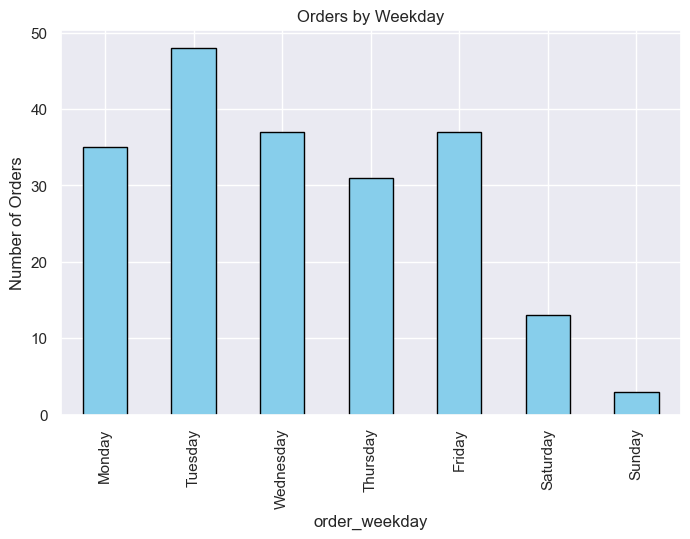

In [51]:
# 1 Order date by weekdays

orders_by_day = merged_metric_1["order_weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

orders_by_day.plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Orders by Weekday")
plt.ylabel("Number of Orders")
plt.show()

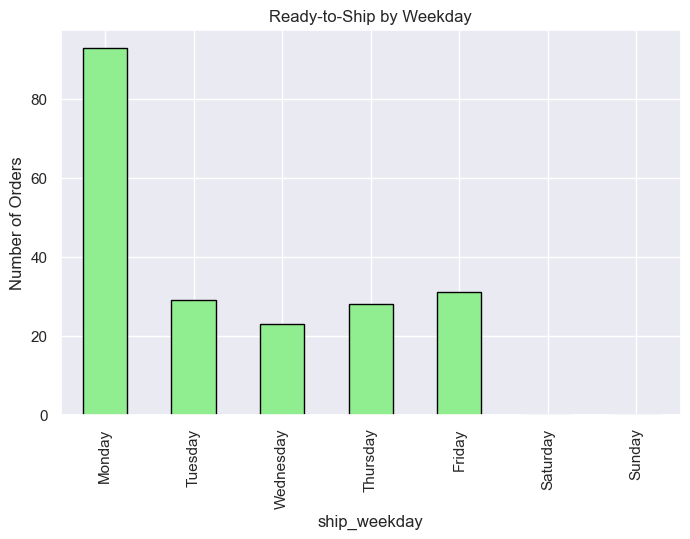

In [52]:
# 2 ready to Ship date by Weekdays

ship_by_day = merged_metric_1["ship_weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

ship_by_day.plot(kind="bar", figsize=(8,5), color="lightgreen", edgecolor="black")
plt.title("Ready-to-Ship by Weekday")
plt.ylabel("Number of Orders")
plt.show()


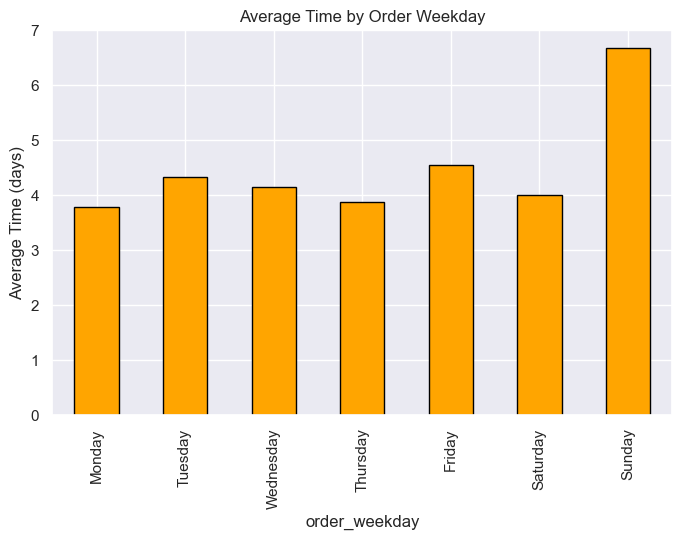

In [53]:
# 3 Average delay by Weekdays

avg_delay_by_day = merged_metric_1.groupby("order_weekday")["date_diff_days"].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

avg_delay_by_day.plot(kind="bar", figsize=(8,5), color="orange", edgecolor="black")
plt.title("Average Time by Order Weekday")
plt.ylabel("Average Time (days)")
plt.show()


In [54]:
merged_metric_1["ship mode"] = merged_metric_1["ship mode"].str.replace(" Class","")
merged_metric_1["ship mode"] = merged_metric_1["ship mode"].str.replace("Second","Standard")
merged_metric_1["ship mode"] = merged_metric_1["ship mode"].str.replace("First","Express")

In [55]:
avg_diff_by_mode = merged_metric_1.groupby("ship mode")["date_diff_days"].mean().reset_index().round(2)
avg_diff_by_mode

,ship mode,date_diff_days
0,Express,2.04
1,Standard,4.93


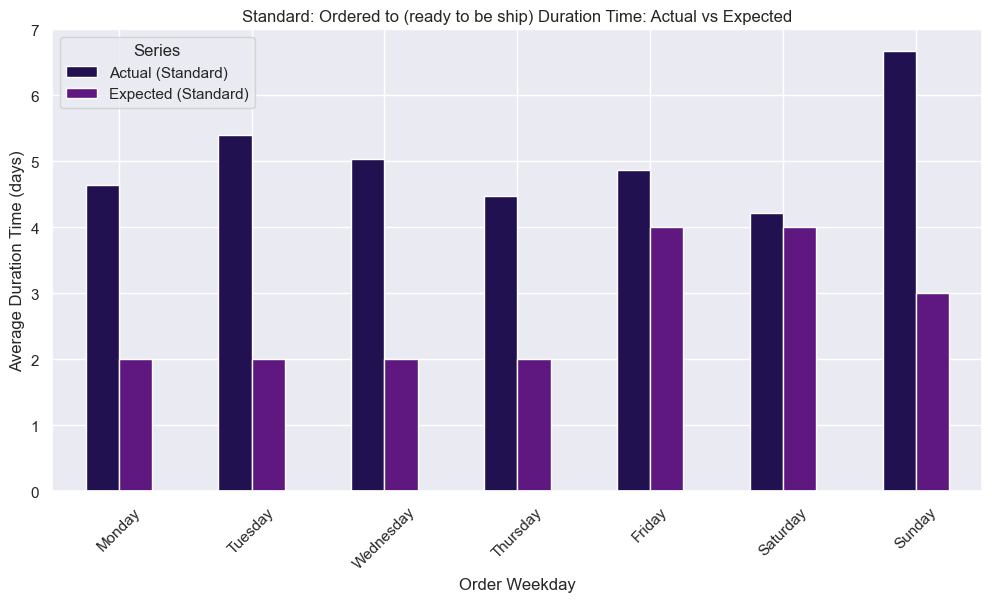

In [56]:
# actual average delay for Standard
actual_std = (
    merged_metric_1[merged_metric_1["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# expected values
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "expected_delay": [2,2,2,2,4,4,3]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# align both (reindex to weekday order)
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
actual_std = actual_std.reindex(weekday_order)
expected_df = expected_df.reindex(weekday_order)

# combine
comparison = pd.DataFrame({
    "Actual (Standard)": actual_std,
    "Expected (Standard)": expected_df["expected_delay"]
})

# plot
comparison.plot(kind="bar", figsize=(12,6))
plt.title("Standard: Ordered to (ready to be ship) Duration Time: Actual vs Expected")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=45)
plt.legend(title="Series")
plt.show()


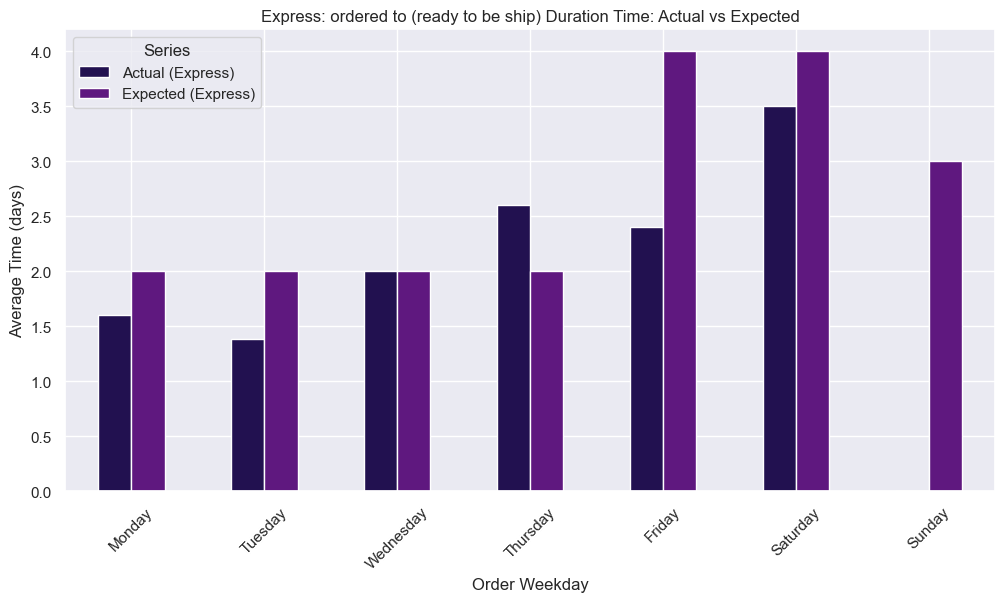

In [57]:
# actual average delay for Express
actual_exp = (
    merged_metric_1[merged_metric_1["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# expected values
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "expected_delay": [2,2,2,2,4,4,3]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# align both (reindex to weekday order)
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
actual_exp = actual_exp.reindex(weekday_order)
expected_df = expected_df.reindex(weekday_order)

# combine into comparison table
comparison = pd.DataFrame({
    "Actual (Express)": actual_exp,
    "Expected (Express)": expected_df["expected_delay"]
})

# plot
comparison.plot(kind="bar", figsize=(12,6))
plt.title("Express: ordered to (ready to be ship) Duration Time: Actual vs Expected")
plt.ylabel("Average Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=45)
plt.legend(title="Series")
plt.show()


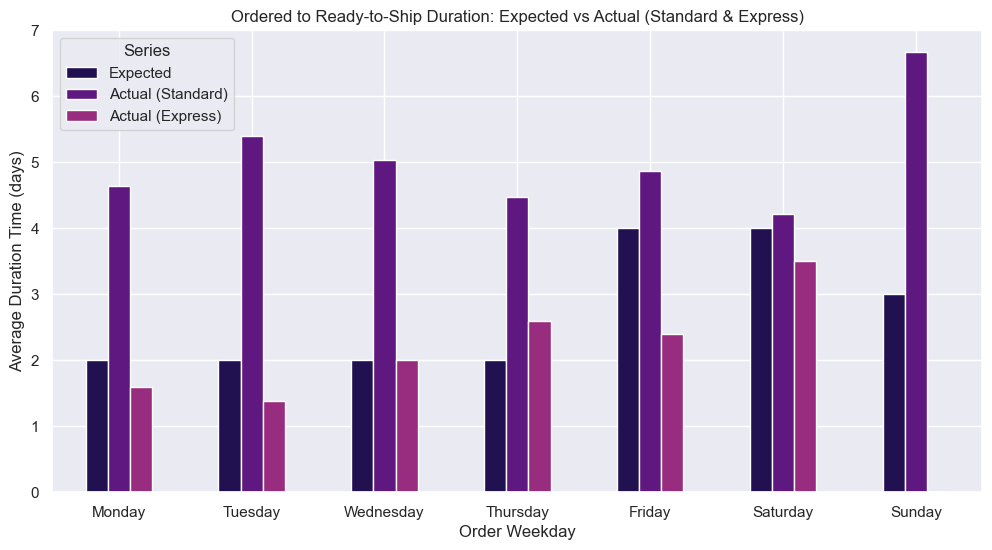

In [58]:
# expected values (same for express & standard)
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "Expected": [2,2,2,2,4,4,3]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# actual average delay for Standard
actual_std = (
    merged_metric_1[merged_metric_1["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# actual average delay for Express
actual_exp = (
    merged_metric_1[merged_metric_1["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# combine into one DataFrame
comparison = pd.DataFrame({
    "Expected": expected_df["Expected"],
    "Actual (Standard)": actual_std,
    "Actual (Express)": actual_exp
})

# plot
comparison.plot(kind="bar", figsize=(12,6))
plt.title("Ordered to Ready-to-Ship Duration: Expected vs Actual (Standard & Express)")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=0)
plt.legend(title="Series")
plt.show()


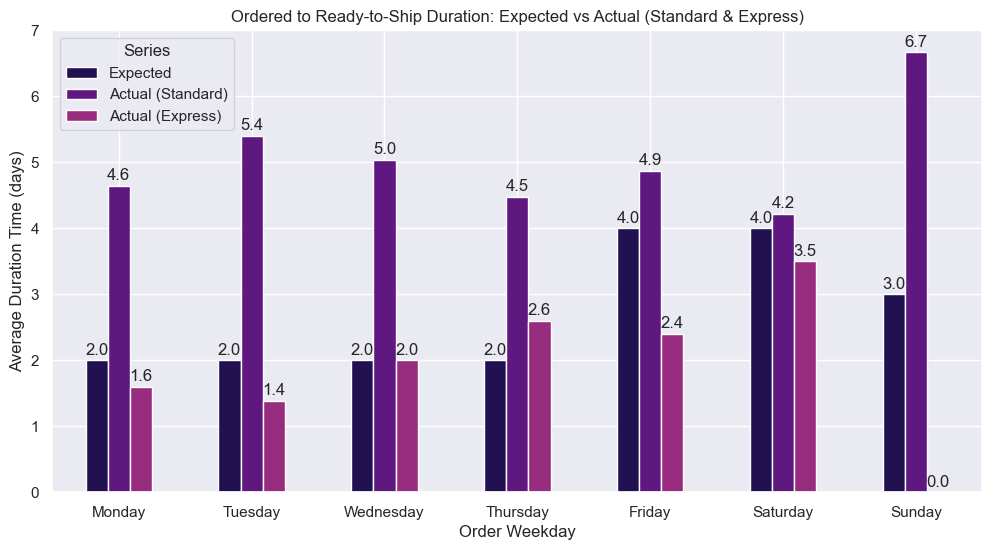

In [59]:
# expected values (same for express & standard)
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "Expected": [2,2,2,2,4,4,3]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# actual average delay for Standard
actual_std = (
    merged_metric_1[merged_metric_1["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# actual average delay for Express
actual_exp = (
    merged_metric_1[merged_metric_1["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# combine into one DataFrame
comparison = pd.DataFrame({
    "Expected": expected_df["Expected"],
    "Actual (Standard)": actual_std,
    "Actual (Express)": actual_exp
})

# plot and add value labels
ax = comparison.plot(kind="bar", figsize=(12,6))
plt.title("Ordered to Ready-to-Ship Duration: Expected vs Actual (Standard & Express)")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=0)
plt.legend(title="Series")

# add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()


### o_processes_2_truck

#### Data

In [60]:
df_processed = df_interndata_cleaned.copy()
df_processed["ready to ship date_weekday"] = df_processed["ready to ship date"].dt.dayofweek
df_processed

,order id,ready to ship date,ready to ship date_weekday
0,CA-2019-116540,2019-09-02,0
2,CA-2019-129847,2019-09-04,2
3,CA-2019-129630,2019-09-04,2
4,CA-2019-106278,2019-09-05,3
5,CA-2019-158099,2019-09-05,3
...,...,...,...
283,US-2020-165456,2020-12-03,3
284,US-2020-110576,2020-12-04,4
285,CA-2020-105333,2020-12-04,4
288,CA-2020-119305,2020-12-04,4


In [61]:
df_processed["ready to ship date_weekday"].value_counts()

ready to ship date_weekday
0    93
4    31
1    29
3    28
2    23
Name: count, dtype: int64

In [62]:
# ready to ship date only Mo - Fr checked!

In [63]:
df_processed_x_truck = df_order_process_cleaned.merge(df_processed, on="order id",how="inner")
df_processed_x_truck

,order id,on truck scan date,ready to ship date,ready to ship date_weekday
0,CA-2019-116540,2019-09-03,2019-09-02,0
1,CA-2019-129847,2019-09-04,2019-09-04,2
2,CA-2019-129630,2019-09-04,2019-09-04,2
3,CA-2019-158099,2019-09-06,2019-09-05,3
4,CA-2019-132143,2019-09-06,2019-09-05,3
...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2
200,US-2020-110576,2020-12-07,2020-12-04,4
201,CA-2020-119305,2020-12-07,2020-12-04,4
202,CA-2020-105333,2020-12-07,2020-12-04,4


In [64]:
df_processed_x_truck_smode = df_processed_x_truck.merge(df_orders_cleaned, on="order id", how="inner")
df_processed_x_truck_smode = df_processed_x_truck_smode[["order id", "on truck scan date", "ready to ship date", "ready to ship date_weekday","ship mode","order date"]]
df_processed_x_truck_smode["o_processed_2_truck_actual"] = df_processed_x_truck_smode["on truck scan date"] - df_processed_x_truck_smode["ready to ship date"]
df_processed_x_truck_smode["o_processed_2_truck_actual"] = df_processed_x_truck_smode["o_processed_2_truck_actual"].dt.days
df_processed_x_truck_smode

,order id,on truck scan date,ready to ship date,ready to ship date_weekday,ship mode,order date,o_processed_2_truck_actual
0,CA-2019-116540,2019-09-03,2019-09-02,0,Express,2019-09-02,1
1,CA-2019-129847,2019-09-04,2019-09-04,2,Express,2019-09-02,0
2,CA-2019-129630,2019-09-04,2019-09-04,2,Express,2019-09-04,0
3,CA-2019-158099,2019-09-06,2019-09-05,3,Express,2019-09-03,1
4,CA-2019-132143,2019-09-06,2019-09-05,3,Express,2019-09-03,1
...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2,Standard,2020-11-27,2
200,US-2020-110576,2020-12-07,2020-12-04,4,Standard,2020-11-28,3
201,CA-2020-119305,2020-12-07,2020-12-04,4,Standard,2020-11-30,3
202,CA-2020-105333,2020-12-07,2020-12-04,4,Standard,2020-11-30,3


In [65]:
df_processed_x_truck_smode["order date_weekday"] = df_processed_x_truck_smode["order date"].dt.day_name()
df_processed_x_truck_smode

,order id,on truck scan date,ready to ship date,ready to ship date_weekday,ship mode,order date,o_processed_2_truck_actual,order date_weekday
0,CA-2019-116540,2019-09-03,2019-09-02,0,Express,2019-09-02,1,Monday
1,CA-2019-129847,2019-09-04,2019-09-04,2,Express,2019-09-02,0,Monday
2,CA-2019-129630,2019-09-04,2019-09-04,2,Express,2019-09-04,0,Wednesday
3,CA-2019-158099,2019-09-06,2019-09-05,3,Express,2019-09-03,1,Tuesday
4,CA-2019-132143,2019-09-06,2019-09-05,3,Express,2019-09-03,1,Tuesday
...,...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2,Standard,2020-11-27,2,Friday
200,US-2020-110576,2020-12-07,2020-12-04,4,Standard,2020-11-28,3,Saturday
201,CA-2020-119305,2020-12-07,2020-12-04,4,Standard,2020-11-30,3,Monday
202,CA-2020-105333,2020-12-07,2020-12-04,4,Standard,2020-11-30,3,Monday


In [66]:
df_processed_x_truck_smode.groupby("ship mode")[["o_processed_2_truck_actual"]].agg(["mean","max","min"])

o_processed_2_truck_actual        
                                mean max min
ship mode                                   
Express                     0.396226   2   0
Standard                    1.986755   3   1

In [67]:
graph_1 = df_processed_x_truck_smode.groupby("ship mode")[["o_processed_2_truck_actual"]].mean().reset_index()
graph_1

,ship mode,o_processed_2_truck_actual
0,Express,0.396226
1,Standard,1.986755


In [68]:
graph_1["o_processed_2_truck_plan"] = {0:0,1:1}
graph_1

,ship mode,o_processed_2_truck_actual,o_processed_2_truck_plan
0,Express,0.396226,0
1,Standard,1.986755,1


In [69]:
# format for plot
graph_1 = pd.melt(graph_1,
    id_vars=["ship mode"],
    value_vars=["o_processed_2_truck_actual", "o_processed_2_truck_plan"],
    var_name="data type",
    value_name="days")

# renaming data type
graph_1["data type"] = graph_1["data type"].map({
    "o_processed_2_truck_actual": "Actual",
    "o_processed_2_truck_plan": "Plan"})

graph_1

,ship mode,data type,days
0,Express,Actual,0.396226
1,Standard,Actual,1.986755
2,Express,Plan,0.000000
3,Standard,Plan,1.000000


In [70]:
graph_2 = df_processed_x_truck_smode.groupby(["ship mode","order date_weekday"])[["o_processed_2_truck_actual"]].mean().reset_index()
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual
0,Express,Friday,0.000000
1,Express,Monday,0.500000
2,Express,Saturday,0.500000
3,Express,Thursday,0.200000
4,Express,Tuesday,0.846154
5,Express,Wednesday,0.090909
6,Standard,Friday,1.812500
7,Standard,Monday,2.280000
8,Standard,Saturday,2.777778
9,Standard,Sunday,1.666667


In [71]:
# no sunday for express?

In [72]:
graph_2["identifyer"]=graph_2["ship mode"]+graph_2["order date_weekday"]
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual,identifyer
0,Express,Friday,0.000000,ExpressFriday
1,Express,Monday,0.500000,ExpressMonday
2,Express,Saturday,0.500000,ExpressSaturday
3,Express,Thursday,0.200000,ExpressThursday
4,Express,Tuesday,0.846154,ExpressTuesday
5,Express,Wednesday,0.090909,ExpressWednesday
6,Standard,Friday,1.812500,StandardFriday
7,Standard,Monday,2.280000,StandardMonday
8,Standard,Saturday,2.777778,StandardSaturday
9,Standard,Sunday,1.666667,StandardSunday


In [73]:
plan_values_dict = {"ExpressMonday":1,
                    "ExpressTuesday":0,
                    "ExpressWednesday":1,
                    "ExpressThursday":0,
                    "ExpressFriday":0,
                    "ExpressSaturday":1,
                    "ExpressSunday":1,
                    "StandardMonday":1,
                    "StandardTuesday":2,
                    "StandardWednesday":1,
                    "StandardThursday":3,
                    "StandardFriday":2,
                    "StandardSaturday":1,
                    "StandardSunday":1
                    }

In [74]:
graph_2["o_processed_2_truck_plan"] = graph_2["identifyer"].map(plan_values_dict)
graph_2 = graph_2.drop("identifyer",axis=1)
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual,o_processed_2_truck_plan
0,Express,Friday,0.000000,0
1,Express,Monday,0.500000,1
2,Express,Saturday,0.500000,1
3,Express,Thursday,0.200000,0
4,Express,Tuesday,0.846154,0
5,Express,Wednesday,0.090909,1
6,Standard,Friday,1.812500,2
7,Standard,Monday,2.280000,1
8,Standard,Saturday,2.777778,1
9,Standard,Sunday,1.666667,1


In [75]:
# format for plot
graph_2 = pd.melt(graph_2,
    id_vars=["ship mode","order date_weekday"],
    value_vars=["o_processed_2_truck_actual", "o_processed_2_truck_plan"],
    var_name="data type",
    value_name="days")

# renaming data type
graph_2["data type"] = graph_2["data type"].map({
    "o_processed_2_truck_actual": "Actual",
    "o_processed_2_truck_plan": "Plan"})

graph_2

,ship mode,order date_weekday,data type,days
0,Express,Friday,Actual,0.000000
1,Express,Monday,Actual,0.500000
2,Express,Saturday,Actual,0.500000
3,Express,Thursday,Actual,0.200000
4,Express,Tuesday,Actual,0.846154
5,Express,Wednesday,Actual,0.090909
6,Standard,Friday,Actual,1.812500
7,Standard,Monday,Actual,2.280000
8,Standard,Saturday,Actual,2.777778
9,Standard,Sunday,Actual,1.666667


In [76]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

graph_2["order date_weekday"] = pd.Categorical(graph_2["order date_weekday"],categories=weekday_order, ordered=True)
graph_2

,ship mode,order date_weekday,data type,days
0,Express,Friday,Actual,0.000000
1,Express,Monday,Actual,0.500000
2,Express,Saturday,Actual,0.500000
3,Express,Thursday,Actual,0.200000
4,Express,Tuesday,Actual,0.846154
5,Express,Wednesday,Actual,0.090909
6,Standard,Friday,Actual,1.812500
7,Standard,Monday,Actual,2.280000
8,Standard,Saturday,Actual,2.777778
9,Standard,Sunday,Actual,1.666667


In [77]:
graph_2_express = graph_2[graph_2["ship mode"]=="Express"].sort_values("order date_weekday")
graph_2_standard = graph_2[graph_2["ship mode"]=="Standard"].sort_values("order date_weekday")

graph_2_express

,ship mode,order date_weekday,data type,days
1,Express,Monday,Actual,0.500000
14,Express,Monday,Plan,1.000000
4,Express,Tuesday,Actual,0.846154
17,Express,Tuesday,Plan,0.000000
5,Express,Wednesday,Actual,0.090909
18,Express,Wednesday,Plan,1.000000
3,Express,Thursday,Actual,0.200000
16,Express,Thursday,Plan,0.000000
0,Express,Friday,Actual,0.000000
13,Express,Friday,Plan,0.000000


#### Plots

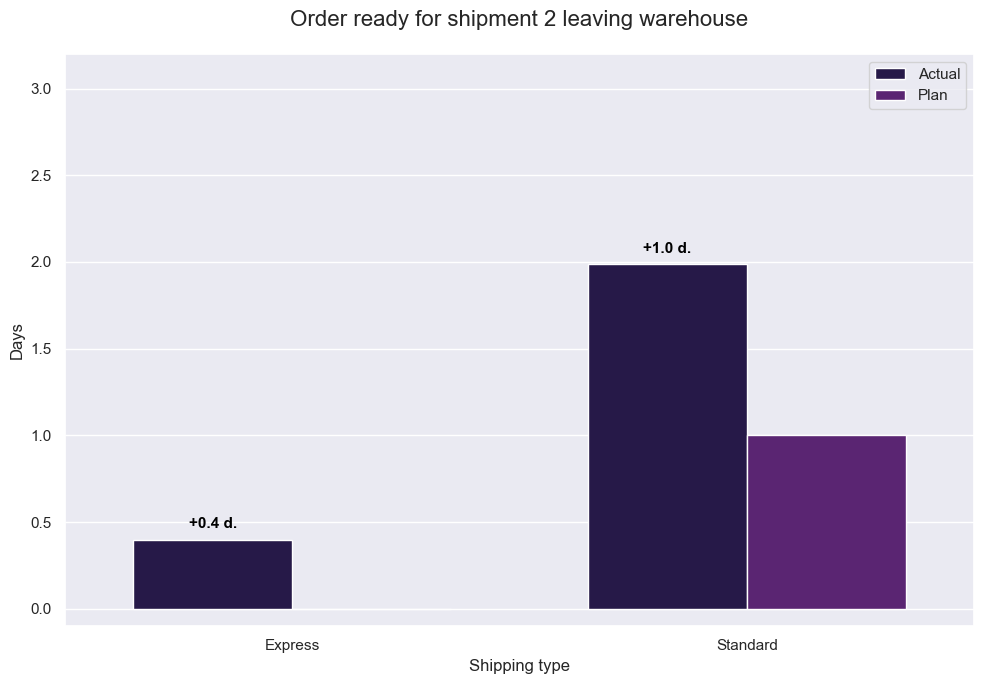

(None,)

In [78]:
graph = graph_1
bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar

plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "ship mode",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width
            )
ax.set_ylim(-0.1, 3.2)
plt.title('Order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Shipping type")
plt.ylabel("Days")
plt.legend()


# Calculate and display the uplift (difference) as text above the bars
# Iterate through each ship mode ('Express' and 'Standard')
for i, ship_mode in enumerate(graph["ship mode"].unique()):
    # Get the 'Actual' and 'Plan' values for the current ship mode
    actual_days = graph[(graph["ship mode"] == ship_mode) & (graph["data type"] == "Actual")]["days"].iloc[0]
    plan_days = graph[(graph["ship mode"] == ship_mode) & (graph["data type"] == "Plan")]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

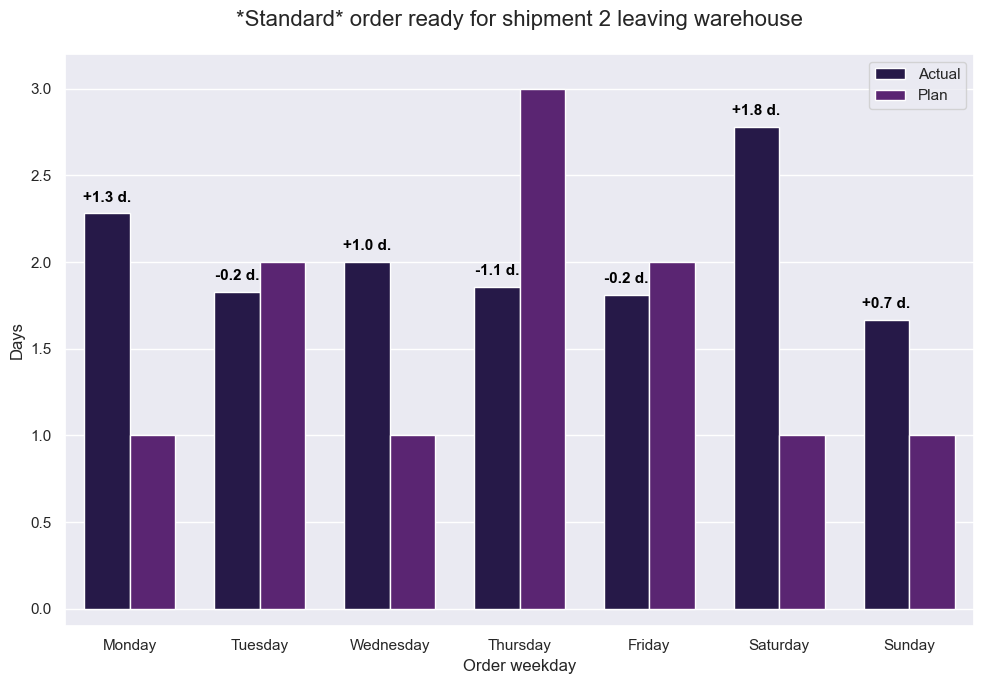

(None,)

In [79]:
graph = graph_2_standard

bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar


plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "order date_weekday",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width,
             errorbar=None
            )
ax.set_ylim(-0.1, 3.2)
plt.title('*Standard* order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Order weekday")
plt.ylabel("Days")
plt.legend()



# Calculate and display the uplift (difference) as text above the bars
# Iterate through each unique WEEKDAY in the data
for i, weekday in enumerate(graph["order date_weekday"].unique()):
    # Get the 'Actual' and 'Plan' values for the current WEEKDAY
    
    # Filter the graph DataFrame by the current weekday
    weekday_data = graph[graph["order date_weekday"] == weekday]
    
    # Use the filtered data to extract the specific Actual and Plan values
    actual_days = weekday_data[weekday_data["data type"] == "Actual"]["days"].iloc[0]
    plan_days = weekday_data[weekday_data["data type"] == "Plan"]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

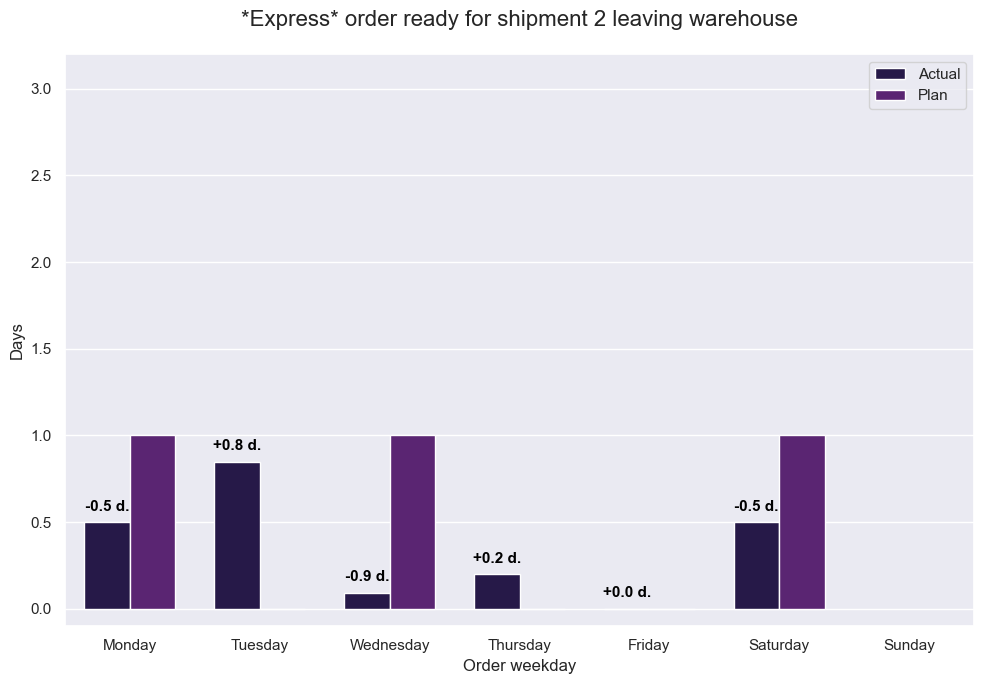

(None,)

In [80]:
graph = graph_2_express

bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar


plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "order date_weekday",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width,
             errorbar=None
            )
ax.set_ylim(-0.1, 3.2)
plt.title('*Express* order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Order weekday")
plt.ylabel("Days")
plt.legend()


# Calculate and display the uplift (difference) as text above the bars
# Iterate through each unique WEEKDAY in the data
for i, weekday in enumerate(graph["order date_weekday"].unique()):
    # Get the 'Actual' and 'Plan' values for the current WEEKDAY
    
    # Filter the graph DataFrame by the current weekday
    weekday_data = graph[graph["order date_weekday"] == weekday]
    
    # Use the filtered data to extract the specific Actual and Plan values
    actual_days = weekday_data[weekday_data["data type"] == "Actual"]["days"].iloc[0]
    plan_days = weekday_data[weekday_data["data type"] == "Plan"]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

In [81]:
graph_2_express

,ship mode,order date_weekday,data type,days
1,Express,Monday,Actual,0.500000
14,Express,Monday,Plan,1.000000
4,Express,Tuesday,Actual,0.846154
17,Express,Tuesday,Plan,0.000000
5,Express,Wednesday,Actual,0.090909
18,Express,Wednesday,Plan,1.000000
3,Express,Thursday,Actual,0.200000
16,Express,Thursday,Plan,0.000000
0,Express,Friday,Actual,0.000000
13,Express,Friday,Plan,0.000000


### o_truck_2_delivered

#### Merging data

In [82]:
merged_o_truck_2_delivered=pd.merge(df_campaign_cleaned,df_order_process_cleaned, on='order id', how='inner' )

In [83]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date
0,CA-2019-109666,2019-05-03,2019-04-29
1,CA-2019-138933,2019-05-03,2019-04-29
2,CA-2019-130001,2019-05-03,2019-05-01
3,CA-2019-113061,2019-05-06,2019-04-29
4,CA-2019-162138,2019-05-06,2019-05-01
...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04
329,CA-2020-125381,2020-05-08,2020-05-01
330,CA-2020-141733,2020-05-15,2020-05-13
331,US-2020-104451,2020-05-15,2020-05-13


In [84]:
merged_o_truck_2_delivered = pd.merge(
    merged_o_truck_2_delivered,
    df_orders_cleaned[['order id', 'ship mode']],  # include key + column you want
    on='order id',
    how='inner'
)

In [85]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode
0,CA-2019-109666,2019-05-03,2019-04-29,Standard
1,CA-2019-138933,2019-05-03,2019-04-29,Express
2,CA-2019-130001,2019-05-03,2019-05-01,Standard
3,CA-2019-113061,2019-05-06,2019-04-29,Standard
4,CA-2019-162138,2019-05-06,2019-05-01,Standard
...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard
329,CA-2020-125381,2020-05-08,2020-05-01,Standard
330,CA-2020-141733,2020-05-15,2020-05-13,Standard
331,US-2020-104451,2020-05-15,2020-05-13,Standard


#### checking na data

In [86]:
merged_o_truck_2_delivered.isna().sum()

order id              0
arrival scan date     0
on truck scan date    0
ship mode             0
dtype: int64

#### calculating time interval between on truck scan date and arrival scan date

In [87]:
merged_o_truck_2_delivered['time interval']=merged_o_truck_2_delivered['arrival scan date']-merged_o_truck_2_delivered['on truck scan date']

In [88]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days
...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days


#### extracting the days for arrival date

In [89]:
merged_o_truck_2_delivered["arrival year"]= merged_o_truck_2_delivered["arrival scan date"].dt.year
merged_o_truck_2_delivered["arrival month"]= merged_o_truck_2_delivered["arrival scan date"].dt.month
merged_o_truck_2_delivered["arrival day"]= merged_o_truck_2_delivered["arrival scan date"].dt.dayofweek

In [90]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,4
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,0
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,0
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,4
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,4
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,4


In [91]:
merged_o_truck_2_delivered['arrival day'].value_counts()

arrival day
0    215
1     40
4     39
2     20
3     19
Name: count, dtype: int64

#### transforming arrival day into weekdays and weekend dates

In [92]:
arrival_day_categories={0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'friday', 6:'saturday', 7:'sunday'}
merged_o_truck_2_delivered['arrival day']=merged_o_truck_2_delivered['arrival day'].map(arrival_day_categories)
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday


#### extracting the days for on truck scan date

In [93]:
merged_o_truck_2_delivered["on truck year"]= merged_o_truck_2_delivered["on truck scan date"].dt.year
merged_o_truck_2_delivered["on truck month"]= merged_o_truck_2_delivered["on truck scan date"].dt.month
merged_o_truck_2_delivered["on truck day"]= merged_o_truck_2_delivered["on truck scan date"].dt.dayofweek

In [94]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,0
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,0
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,0
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,2
...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,0
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,4
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,2


In [95]:
merged_o_truck_2_delivered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            333 non-null    object         
 1   arrival scan date   333 non-null    datetime64[ns] 
 2   on truck scan date  333 non-null    datetime64[ns] 
 3   ship mode           333 non-null    object         
 4   time interval       333 non-null    timedelta64[ns]
 5   arrival year        333 non-null    int32          
 6   arrival month       333 non-null    int32          
 7   arrival day         333 non-null    object         
 8   on truck year       333 non-null    int32          
 9   on truck month      333 non-null    int32          
 10  on truck day        333 non-null    int32          
dtypes: datetime64[ns](2), int32(5), object(3), timedelta64[ns](1)
memory usage: 22.2+ KB


In [96]:
merged_o_truck_2_delivered['actual duration']=merged_o_truck_2_delivered['time interval'].dt.days

In [97]:
merged_o_truck_2_delivered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            333 non-null    object         
 1   arrival scan date   333 non-null    datetime64[ns] 
 2   on truck scan date  333 non-null    datetime64[ns] 
 3   ship mode           333 non-null    object         
 4   time interval       333 non-null    timedelta64[ns]
 5   arrival year        333 non-null    int32          
 6   arrival month       333 non-null    int32          
 7   arrival day         333 non-null    object         
 8   on truck year       333 non-null    int32          
 9   on truck month      333 non-null    int32          
 10  on truck day        333 non-null    int32          
 11  actual duration     333 non-null    int64          
dtypes: datetime64[ns](2), int32(5), int64(1), object(3), timedelta64[ns](1)
memory usage: 24.8+ 

In [98]:
merged_o_truck_2_delivered['on truck day'].value_counts()

on truck day
2    199
4     78
0     46
1     10
Name: count, dtype: int64

#### transforming on truck scan date into weekdays and weekends date

In [99]:
on_truck_day_categories={0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'friday', 6:'saturday', 7:'sunday'}
merged_o_truck_2_delivered['on truck day']=merged_o_truck_2_delivered['on truck day'].map(on_truck_day_categories)
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,monday,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,monday,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,wednesday,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,monday,7
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,wednesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,monday,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,friday,7
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2


In [100]:
merged_o_truck_2_delivered['on truck day'].value_counts()

on truck day
wednesday    199
friday        78
monday        46
tuesday       10
Name: count, dtype: int64

In [101]:
merged_o_truck_2_delivered['arrival day'].value_counts()

arrival day
monday       215
tuesday       40
friday        39
wednesday     20
thursday      19
Name: count, dtype: int64

#### calculating the average actual duration of on truck to delivery 

In [102]:
result_on_truck=merged_o_truck_2_delivered.groupby(['ship mode','on truck day'])['actual duration'].mean().round(2).reset_index()

In [103]:
result_on_truck


,ship mode,on truck day,actual duration
0,Express,friday,3.79
1,Express,monday,4.88
2,Express,tuesday,5.33
3,Express,wednesday,4.86
4,Standard,friday,4.12
5,Standard,monday,4.33
6,Standard,tuesday,5.00
7,Standard,wednesday,4.83


In [104]:
result_on_truck["expected duration"] = [3, 3, 2, 4, 3, 3, 4, 4]

In [105]:
result_on_truck

,ship mode,on truck day,actual duration,expected duration
0,Express,friday,3.79,3
1,Express,monday,4.88,3
2,Express,tuesday,5.33,2
3,Express,wednesday,4.86,4
4,Standard,friday,4.12,3
5,Standard,monday,4.33,3
6,Standard,tuesday,5.00,4
7,Standard,wednesday,4.83,4


In [106]:
result_arrival=merged_o_truck_2_delivered.groupby(['ship mode','arrival day'])['actual duration'].mean().round(2).reset_index()

In [107]:
result_arrival

,ship mode,arrival day,actual duration
0,Express,friday,3.30
1,Express,monday,4.64
2,Express,thursday,3.60
3,Express,tuesday,4.82
4,Express,wednesday,5.29
5,Standard,friday,3.34
6,Standard,monday,4.90
7,Standard,thursday,3.79
8,Standard,tuesday,4.86
9,Standard,wednesday,4.54


In [108]:
result_arrival["expected duration"] = [3, 3, 2, 4, 4, 3, 3, 4, 4, 3]

In [109]:
result_arrival

,ship mode,arrival day,actual duration,expected duration
0,Express,friday,3.30,3
1,Express,monday,4.64,3
2,Express,thursday,3.60,2
3,Express,tuesday,4.82,4
4,Express,wednesday,5.29,4
5,Standard,friday,3.34,3
6,Standard,monday,4.90,3
7,Standard,thursday,3.79,4
8,Standard,tuesday,4.86,4
9,Standard,wednesday,4.54,3


In [110]:
result_on_truck.query("`ship mode` == 'Standard'")

,ship mode,on truck day,actual duration,expected duration
4,Standard,friday,4.12,3
5,Standard,monday,4.33,3
6,Standard,tuesday,5.00,4
7,Standard,wednesday,4.83,4


In [111]:
merged_o_truck_2_delivered_weekdays_on_truck = merged_o_truck_2_delivered.query(
    "`on truck day` in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']"
)

In [112]:
merged_o_truck_2_delivered_weekdays_on_truck = merged_o_truck_2_delivered.query(
    "`on truck day` in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']"
)

In [113]:
average_actual_duration_weekdays_on_truck= merged_o_truck_2_delivered_weekdays_on_truck.groupby('ship mode')['actual duration'].mean().round(2)

In [114]:
average_actual_duration_weekdays_on_truck= merged_o_truck_2_delivered_weekdays_on_truck.groupby('ship mode')['actual duration'].mean().round(2)

In [115]:
merged_o_truck_2_delivered_weekdays_arrival = merged_o_truck_2_delivered.query(
    "`arrival day` in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']"
)

In [116]:
merged_o_truck_2_delivered_weekdays_arrival

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,monday,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,monday,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,wednesday,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,monday,7
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,wednesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,monday,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,friday,7
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2


In [117]:
merged_o_truck_2_delivered_weekends_arrival= merged_o_truck_2_delivered.query(
    "`arrival day` in ['saturday', 'sunday']")

In [118]:
merged_o_truck_2_delivered_weekends_arrival

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration


#### visualization

/var/folders/xc/y6vw2n510h1fmnwd2wj1zqdc0000gn/T/ipykernel_18891/3869407665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


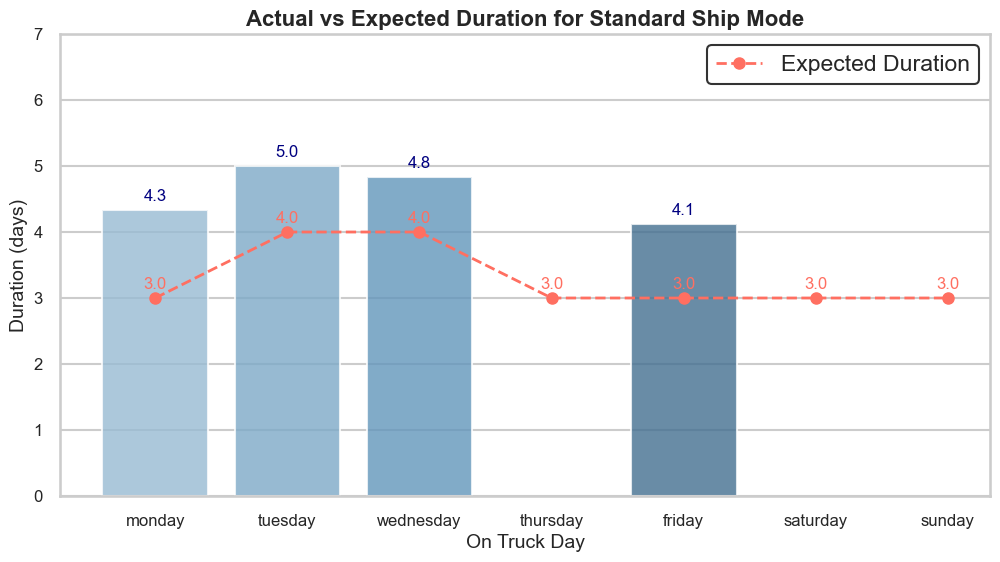

In [119]:
# Data including missing days
standard_data = pd.DataFrame({
    "on_truck_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.33, 5.00, 4.83, None, 4.12, None, None],  # actual durations
    "expected duration normal": [3, 4, 4, 3, 3, 3, 3]  # expected durations
})

day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="on_truck_day",
    y="actual duration",
    data=standard_data,
    palette="Blues_d",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as dashed line with points
plt.plot(
    day_order,
    standard_data["expected duration normal"],
    color="#FF6F61",  # soft red
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate bars with actual duration
for i, val in enumerate(standard_data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='navy')

# Annotate expected durations on points
for i, val in enumerate(standard_data["expected duration normal"]):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

# Labels and title
plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("On Truck Day", fontsize=14)
plt.title("Actual vs Expected Duration for Standard Ship Mode", fontsize=16, weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(standard_data["actual duration"].max(), max(standard_data["expected duration normal"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Standard Ship Mode for On Truck', dpi=300, bbox_inches='tight')

plt.show()


In [120]:
result_arrival.query("`ship mode` == 'Standard'")

,ship mode,arrival day,actual duration,expected duration
5,Standard,friday,3.34,3
6,Standard,monday,4.90,3
7,Standard,thursday,3.79,4
8,Standard,tuesday,4.86,4
9,Standard,wednesday,4.54,3


/var/folders/xc/y6vw2n510h1fmnwd2wj1zqdc0000gn/T/ipykernel_18891/1207232642.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


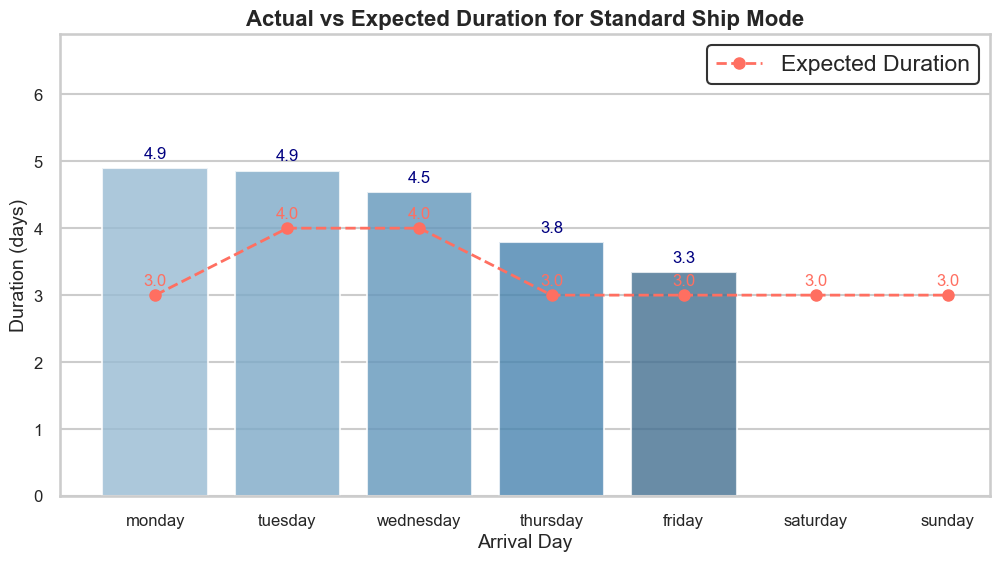

In [121]:
# Data including missing days
standard_data = pd.DataFrame({
    "arrival_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.90, 4.86, 4.54, 3.79, 3.34, None, None],  # actual durations
    "expected duration normal": [3, 4, 4, 3, 3, 3, 3]  # expected durations
})

day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="arrival_day",
    y="actual duration",
    data=standard_data,
    palette="Blues_d",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as dashed line with points
plt.plot(
    day_order,
    standard_data["expected duration normal"],
    color="#FF6F61",  # soft red
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate bars with actual duration
for i, val in enumerate(standard_data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='navy')

# Annotate expected durations on points
for i, val in enumerate(standard_data["expected duration normal"]):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

# Labels and title
plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("Arrival Day", fontsize=14)
plt.title("Actual vs Expected Duration for Standard Ship Mode", fontsize=16, weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(standard_data["actual duration"].max(), max(standard_data["expected duration normal"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Standard Ship Mode for Arrival Day', dpi=300, bbox_inches='tight')

plt.show()

In [122]:
result_on_truck.query("`ship mode` == 'Express'")

,ship mode,on truck day,actual duration,expected duration
0,Express,friday,3.79,3
1,Express,monday,4.88,3
2,Express,tuesday,5.33,2
3,Express,wednesday,4.86,4


/var/folders/xc/y6vw2n510h1fmnwd2wj1zqdc0000gn/T/ipykernel_18891/489017136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


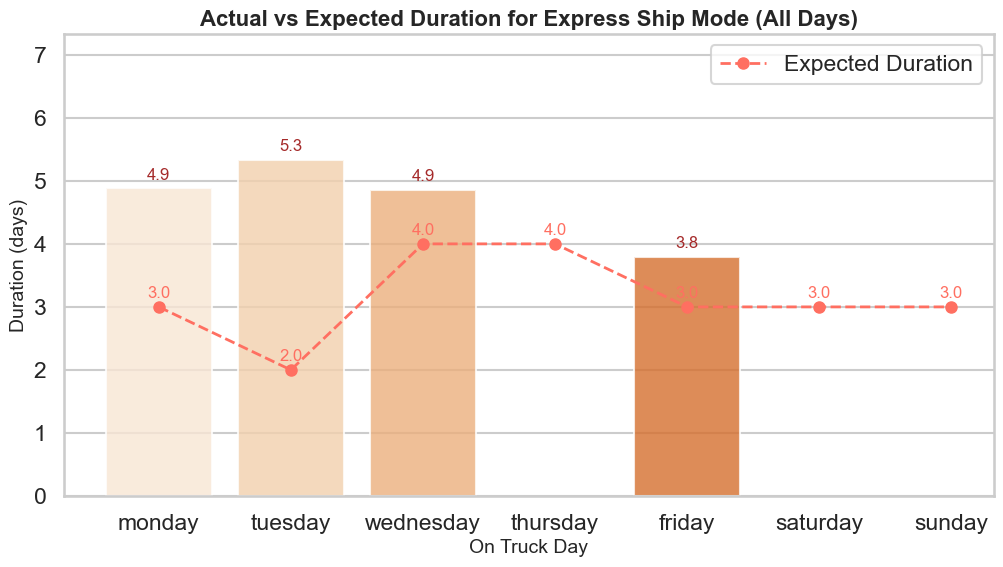

In [123]:
# Data including all days
data = pd.DataFrame({
    "ship_mode": ["Express"]*7,
    "on_truck_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.88, 5.33, 4.86, None, 3.79, None, None],  # actual durations
    "expected_duration": [3, 2, 4, 4, 3, 3, 3]  # expected durations
})

# Define the full day order
day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="on_truck_day",
    y="actual duration",
    data=data,
    palette="Oranges",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as line with points
plt.plot(
    day_order,
    data["expected_duration"],
    color="#FF6F61",  # red for expected
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate actual durations
for i, val in enumerate(data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='brown')

# Annotate expected durations
for i, val in enumerate(data["expected_duration"]):
    bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("On Truck Day", fontsize=14)
plt.title("Actual vs Expected Duration for Express Ship Mode (All Days)", fontsize=16, weight='bold')
plt.legend()
plt.ylim(0, max(data["actual duration"].max(skipna=True), max(data["expected_duration"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Express Ship Mode for On Truck', dpi=300, bbox_inches='tight')

plt.show()



In [124]:
result_arrival.query("`ship mode` == 'Express'")

,ship mode,arrival day,actual duration,expected duration
0,Express,friday,3.30,3
1,Express,monday,4.64,3
2,Express,thursday,3.60,2
3,Express,tuesday,4.82,4
4,Express,wednesday,5.29,4


/var/folders/xc/y6vw2n510h1fmnwd2wj1zqdc0000gn/T/ipykernel_18891/3757862092.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


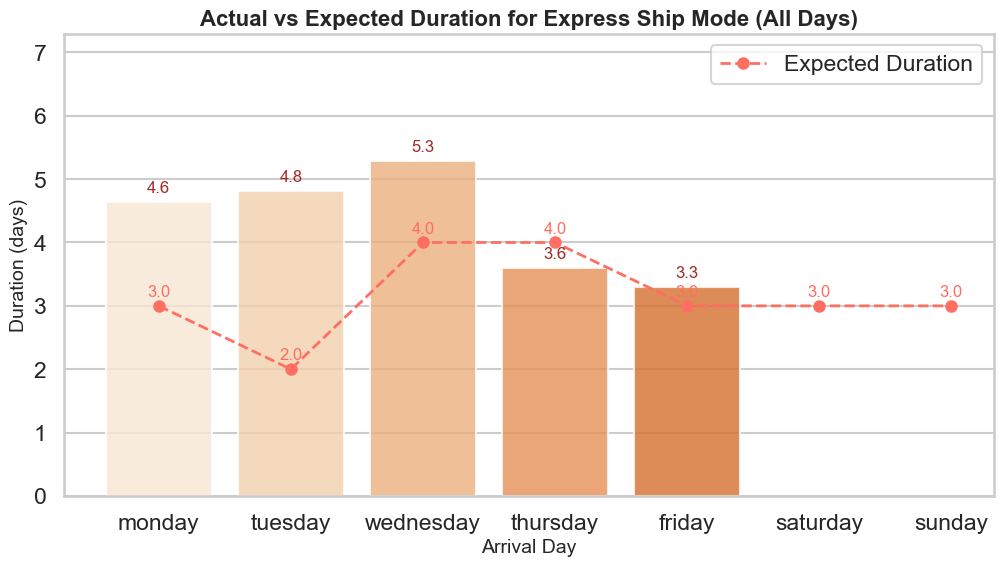

In [125]:
# Data including all days
data = pd.DataFrame({
    "ship_mode": ["Express"]*7,
    "arrival_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.64, 4.82, 5.29, 3.60, 3.30, None, None],  # actual durations
    "expected_duration": [3, 2, 4, 4, 3, 3, 3]  # expected durations
})

# Define the full day order
day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="arrival_day",
    y="actual duration",
    data=data,
    palette="Oranges",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as line with points
plt.plot(
    day_order,
    data["expected_duration"],
    color="#FF6F61",  # red for expected
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate actual durations
for i, val in enumerate(data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='brown')

# Annotate expected durations
for i, val in enumerate(data["expected_duration"]):
    bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("Arrival Day", fontsize=14)
plt.title("Actual vs Expected Duration for Express Ship Mode (All Days)", fontsize=16, weight='bold')
plt.legend()
plt.ylim(0, max(data["actual duration"].max(skipna=True), max(data["expected_duration"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Express Ship Mode for Arrival Day', dpi=300, bbox_inches='tight')

plt.show()

In [126]:
average_actual_duration_weekdays_on_truck

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

In [127]:
average_actual_duration_weekdays_on_truck

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

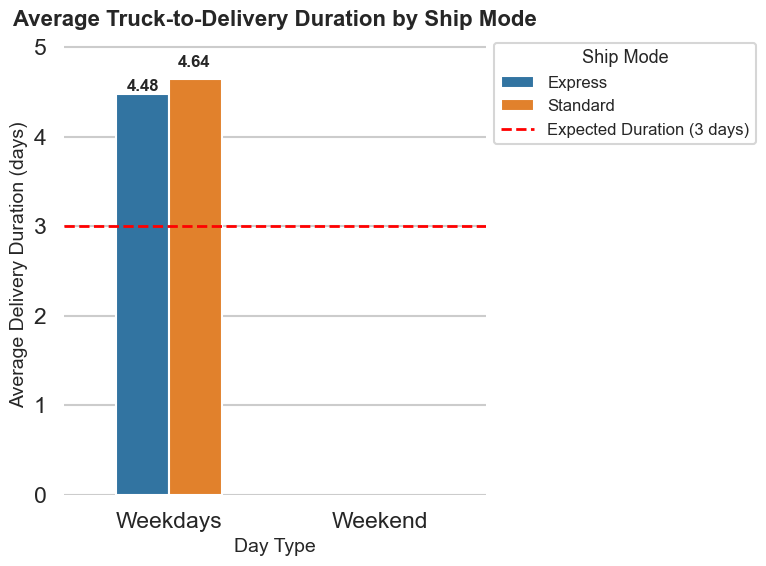

In [128]:
# Dataset
data = {
    'Day Type': ['Weekdays', 'Weekend'],
    'Express': [4.48, None],
    'Standard': [4.64, None]
}
df = pd.DataFrame(data)

# Melt for seaborn
df_melted = df.melt(
    id_vars='Day Type',
    value_vars=['Express', 'Standard'],
    var_name='Ship Mode',
    value_name='Average Duration'
)

# Color palette
palette = {'Express': '#1f77b4', 'Standard': '#ff7f0e'}

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Day Type',
    y='Average Duration',
    hue='Ship Mode',
    data=df_melted,
    palette=palette,
    dodge=True,
    width=0.5
)

# Horizontal line for expected duration
plt.axhline(3, color='red', linestyle='--', linewidth=2, label='Expected Duration (3 days)')

# Add labels above bars with stagger and increased horizontal shift for Standard
stagger_amount = 0.1  # vertical offset to separate labels
horizontal_shift = 0.12  # increased horizontal offset for Standard

for p, (_, row) in zip(ax.patches, df_melted.iterrows()):
    val = row['Average Duration']
    if pd.notna(val):
        x = p.get_x() + p.get_width() / 2.
        y = val + stagger_amount if row['Ship Mode'] == 'Standard' else val
        # Shift Standard further to the right
        if row['Ship Mode'] == 'Standard':
            x += horizontal_shift
        ax.annotate(f"{val:.2f}",
                    (x, y),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

# Style tweaks
plt.ylabel("Average Delivery Duration (days)", fontsize=14)
plt.xlabel("Day Type", fontsize=14)
plt.title("Average Truck-to-Delivery Duration by Ship Mode", fontsize=16, fontweight='bold')
plt.ylim(0, max(df_melted['Average Duration'].dropna()) + 0.5)

# Legend outside
plt.legend(title='Ship Mode', loc='upper left', bbox_to_anchor=(1,1), fontsize=12, title_fontsize=13)
sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.savefig('Actual_Truck-to-Delivery_Duration_by_Ship_Mode.png', dpi=300, bbox_inches='tight')

plt.show()




### o_date_2_delivered

In [129]:
merged_metric_2 = df_orders_cleaned.merge(df_campaign_cleaned, on="order id", how="outer").dropna()
merged_metric_2

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region,arrival scan date
1699,CA-2019-100041,2019-11-20,Standard,BF-10975,United States,Columbus,Indiana,47201.0,Central,2019-12-02
1700,CA-2019-100083,2019-11-24,Standard,CD-11980,United States,Medford,Oregon,97504.0,West,2019-12-09
1703,CA-2019-100244,2019-09-20,Standard,GM-14695,United States,San Francisco,California,94122.0,West,2019-09-30
1706,CA-2019-100468,2019-11-24,Standard,AT-10435,United States,Los Angeles,California,90045.0,West,2019-12-09
1707,CA-2019-100510,2019-05-12,Standard,HM-14860,United States,New York City,New York,10024.0,East,2019-05-28
...,...,...,...,...,...,...,...,...,...,...
4897,US-2020-139647,2020-05-11,Express,TS-21370,United States,Phoenix,Arizona,85023.0,West,2020-05-15
4931,US-2020-148551,2020-01-12,Standard,DB-13120,United States,Dallas,Texas,75217.0,Central,2020-01-22
4965,US-2020-158512,2020-01-12,Standard,DA-13450,United States,Washington,District of Columbia,20016.0,East,2020-01-27
4981,US-2020-163195,2020-02-17,Standard,LL-16840,United States,Lafayette,Louisiana,70506.0,South,2020-03-02


In [130]:
merged_metric_2["date_diff"] = merged_metric_2["arrival scan date"]-merged_metric_2["order date"]
merged_metric_2

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region,arrival scan date,date_diff
1699,CA-2019-100041,2019-11-20,Standard,BF-10975,United States,Columbus,Indiana,47201.0,Central,2019-12-02,12 days
1700,CA-2019-100083,2019-11-24,Standard,CD-11980,United States,Medford,Oregon,97504.0,West,2019-12-09,15 days
1703,CA-2019-100244,2019-09-20,Standard,GM-14695,United States,San Francisco,California,94122.0,West,2019-09-30,10 days
1706,CA-2019-100468,2019-11-24,Standard,AT-10435,United States,Los Angeles,California,90045.0,West,2019-12-09,15 days
1707,CA-2019-100510,2019-05-12,Standard,HM-14860,United States,New York City,New York,10024.0,East,2019-05-28,16 days
...,...,...,...,...,...,...,...,...,...,...,...
4897,US-2020-139647,2020-05-11,Express,TS-21370,United States,Phoenix,Arizona,85023.0,West,2020-05-15,4 days
4931,US-2020-148551,2020-01-12,Standard,DB-13120,United States,Dallas,Texas,75217.0,Central,2020-01-22,10 days
4965,US-2020-158512,2020-01-12,Standard,DA-13450,United States,Washington,District of Columbia,20016.0,East,2020-01-27,15 days
4981,US-2020-163195,2020-02-17,Standard,LL-16840,United States,Lafayette,Louisiana,70506.0,South,2020-03-02,14 days


In [131]:
merged_metric_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1699 to 5003
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   order id           333 non-null    object         
 1   order date         333 non-null    datetime64[ns] 
 2   ship mode          333 non-null    object         
 3   customer id        333 non-null    object         
 4   country/region     333 non-null    object         
 5   city               333 non-null    object         
 6   state              333 non-null    object         
 7   postal code        333 non-null    float64        
 8   region             333 non-null    object         
 9   arrival scan date  333 non-null    datetime64[ns] 
 10  date_diff          333 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(7), timedelta64[ns](1)
memory usage: 31.2+ KB


In [132]:
merged_metric_2["date_diff_days"] = merged_metric_2["date_diff"].dt.days

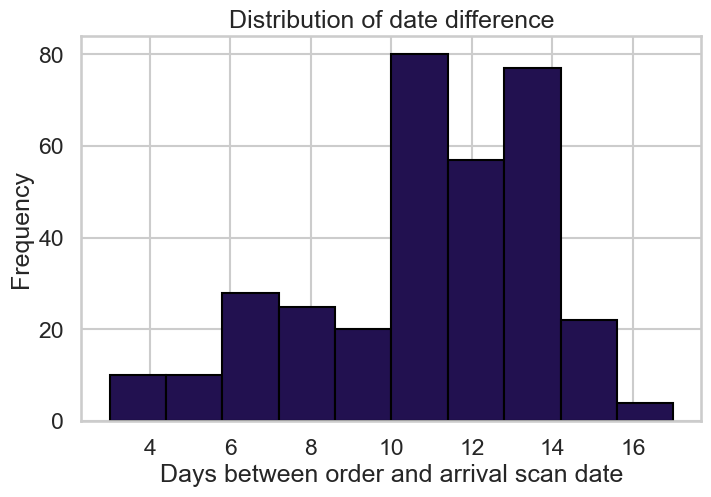

In [133]:
# 1. Distribution of date_diff
plt.figure(figsize=(8,5))
plt.hist(merged_metric_2["date_diff_days"], edgecolor="black")
plt.title("Distribution of date difference")
plt.xlabel("Days between order and arrival scan date")
plt.ylabel("Frequency")
plt.show()

In [134]:
# Order weekday (0=Monday, 6=Sunday)
merged_metric_2["order_weekday"] = merged_metric_2["order date"].dt.day_name()

# Ready-to-ship weekday
merged_metric_2["arrival_weekday"] = merged_metric_2["arrival scan date"].dt.day_name()


In [135]:
orders_by_day = merged_metric_2["order_weekday"].value_counts()
arrival_by_day = merged_metric_2["arrival_weekday"].value_counts()
avg_delay_by_day = merged_metric_2.groupby("order_weekday")["date_diff_days"].mean()


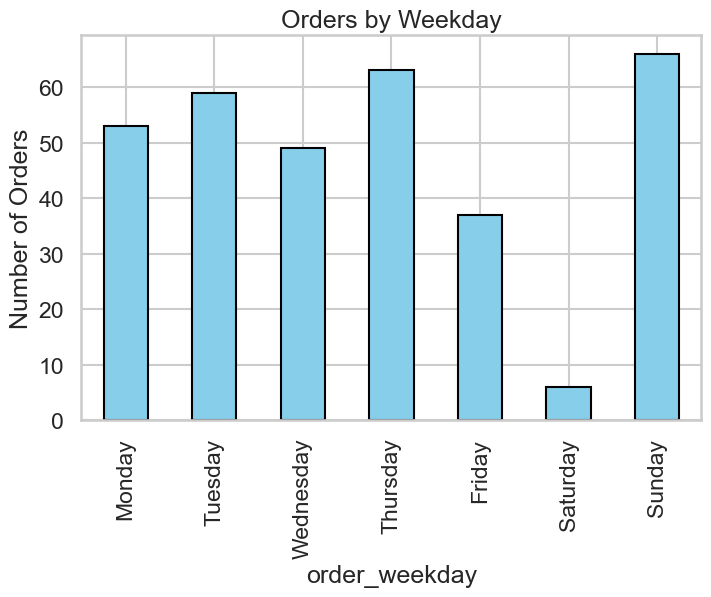

In [136]:
# 1 Order date by weekdays

orders_by_day = merged_metric_2["order_weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

orders_by_day.plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Orders by Weekday")
plt.ylabel("Number of Orders")
plt.show()


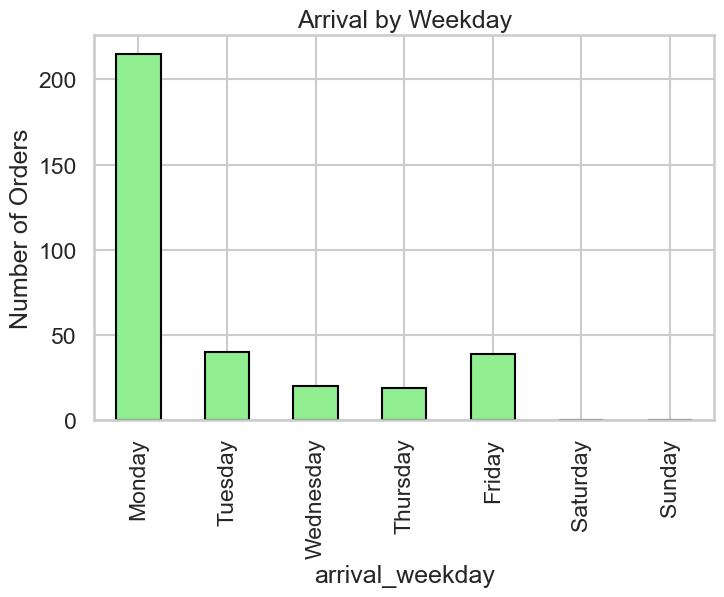

In [137]:
# 2 Arrival date by Weekdays

arrival_by_day= merged_metric_2["arrival_weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

arrival_by_day.plot(kind="bar", figsize=(8,5), color="lightgreen", edgecolor="black")
plt.title("Arrival by Weekday")
plt.ylabel("Number of Orders")
plt.show()

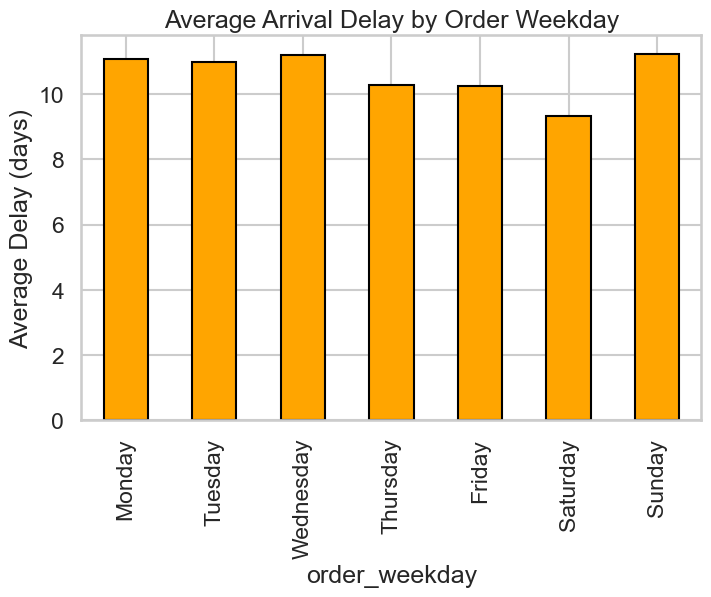

In [138]:
# 3 Average Arrival delay by Weekdays

avg_delay_by_day = merged_metric_2.groupby("order_weekday")["date_diff_days"].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

avg_delay_by_day.plot(kind="bar", figsize=(8,5), color="orange", edgecolor="black")
plt.title("Average Arrival Delay by Order Weekday")
plt.ylabel("Average Delay (days)")
plt.show()


In [139]:
# 

merged_metric_2["ship mode"] = merged_metric_2["ship mode"].str.replace(" Class","")
merged_metric_2["ship mode"] = merged_metric_2["ship mode"].str.replace("Second","Standard")
merged_metric_2["ship mode"] = merged_metric_2["ship mode"].str.replace("First","Express")

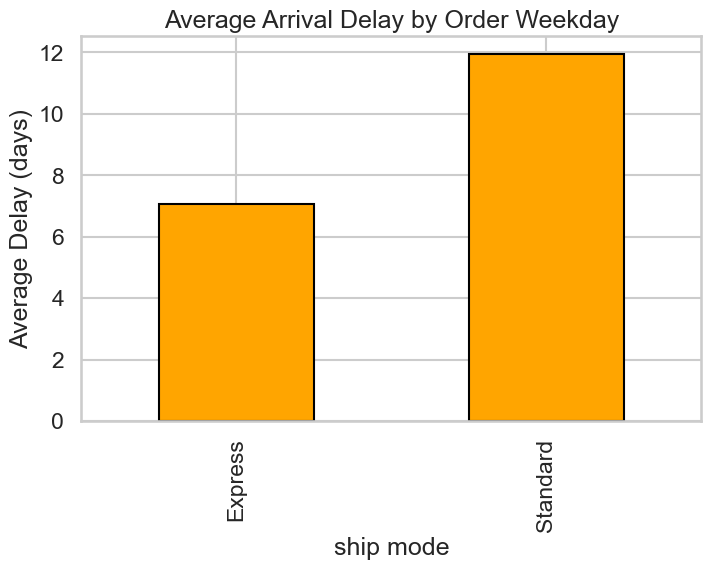

In [140]:
# 3 Average Arrival delay by Ship mode

avg_delay_by_day = merged_metric_2.groupby("ship mode")["date_diff_days"].mean()#.reindex(
#    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
#)

avg_delay_by_day.plot(kind="bar", figsize=(8,5), color="orange", edgecolor="black")
plt.title("Average Arrival Delay by Order Weekday")
plt.ylabel("Average Delay (days)")
plt.show()


In [141]:
avg_delay = merged_metric_2.groupby(["order_weekday","ship mode"])["date_diff_days"].mean().round(2)
avg_delay

order_weekday  ship mode
Friday         Express       7.83
               Standard     10.71
Monday         Express       6.56
               Standard     13.03
Saturday       Express       7.50
               Standard     10.25
Sunday         Express       7.59
               Standard     12.49
Thursday       Express       6.67
               Standard     11.14
Tuesday        Express       6.71
               Standard     12.31
Wednesday      Express       7.38
               Standard     11.95
Name: date_diff_days, dtype: float64

In [142]:
avg_diff_by_mode_2 = merged_metric_2.groupby("ship mode")["date_diff_days"].mean().reset_index().round(2)
avg_diff_by_mode_2

,ship mode,date_diff_days
0,Express,7.05
1,Standard,11.93


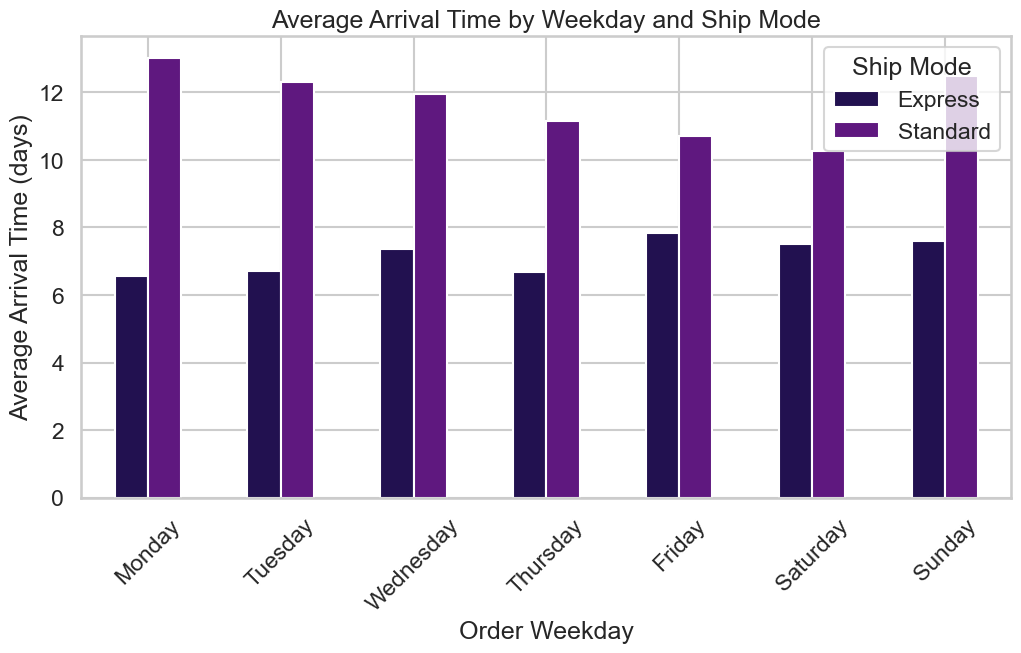

In [143]:
# 4 Average Arrival delay by Ship mode

avg_delay = merged_metric_2.groupby(["order_weekday","ship mode"])["date_diff_days"].mean().unstack()

# ensure weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
avg_delay = avg_delay.reindex(weekday_order)

# plot
avg_delay.plot(kind="bar", figsize=(12,6))
plt.title("Average Arrival Time by Weekday and Ship Mode")
plt.ylabel("Average Arrival Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=45)
plt.legend(title="Ship Mode")
plt.show()


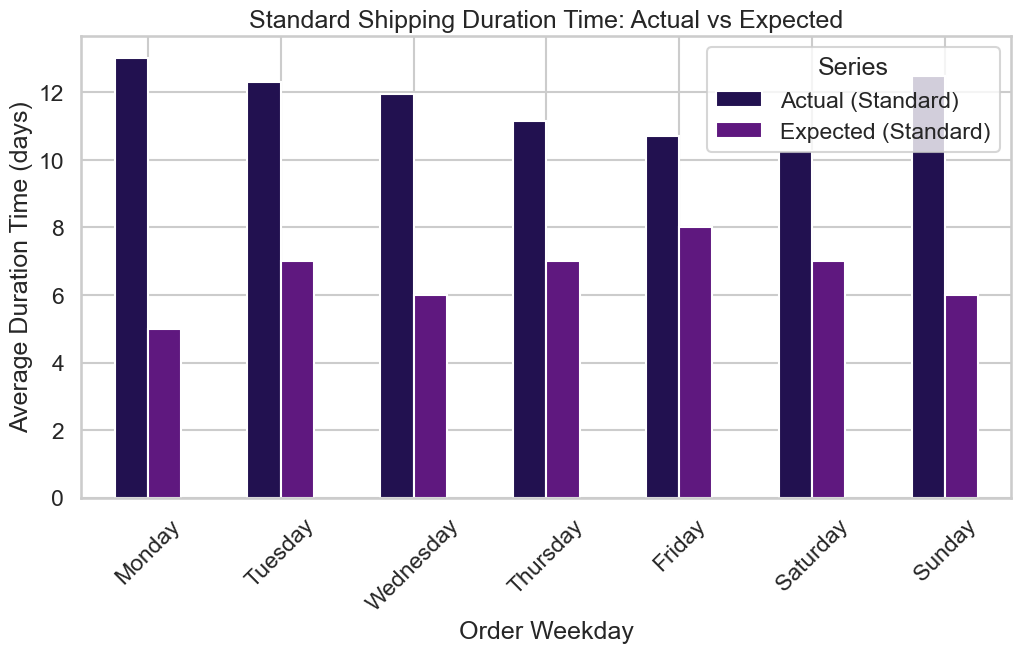

In [144]:
# actual average delay for Standard
actual_std = (
    merged_metric_2[merged_metric_2["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# expected values
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "expected_delay": [5,7,6,7,8,7,6]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# align both (reindex to weekday order)
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
actual_std = actual_std.reindex(weekday_order)
expected_df = expected_df.reindex(weekday_order)

# combine
comparison = pd.DataFrame({
    "Actual (Standard)": actual_std,
    "Expected (Standard)": expected_df["expected_delay"]
})

# plot
comparison.plot(kind="bar", figsize=(12,6))
plt.title("Standard Shipping Duration Time: Actual vs Expected")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=45)
plt.legend(title="Series")
plt.show()


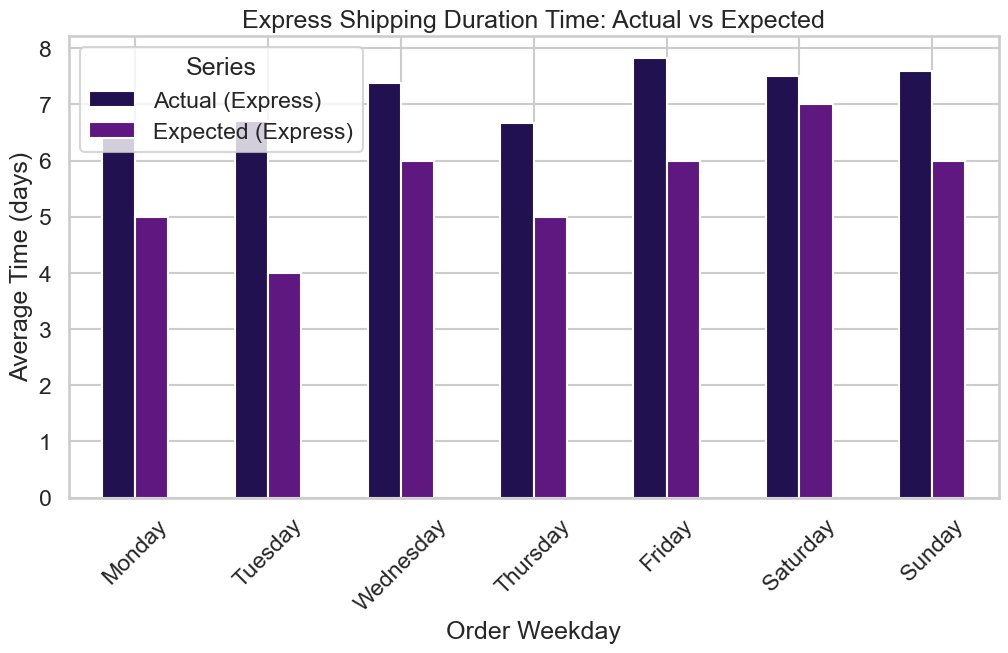

In [145]:
# actual average delay for Express
actual_exp = (
    merged_metric_2[merged_metric_2["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# expected values
expected_data = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "expected_delay": [5,4,6,5,6,7,6]
}
expected_df = pd.DataFrame(expected_data).set_index("order_weekday")

# align both (reindex to weekday order)
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
actual_exp = actual_exp.reindex(weekday_order)
expected_df = expected_df.reindex(weekday_order)

# combine into comparison table
comparison = pd.DataFrame({
    "Actual (Express)": actual_exp,
    "Expected (Express)": expected_df["expected_delay"]
})

# plot
comparison.plot(kind="bar", figsize=(12,6))
plt.title("Express Shipping Duration Time: Actual vs Expected")
plt.ylabel("Average Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=45)
plt.legend(title="Series")
plt.show()


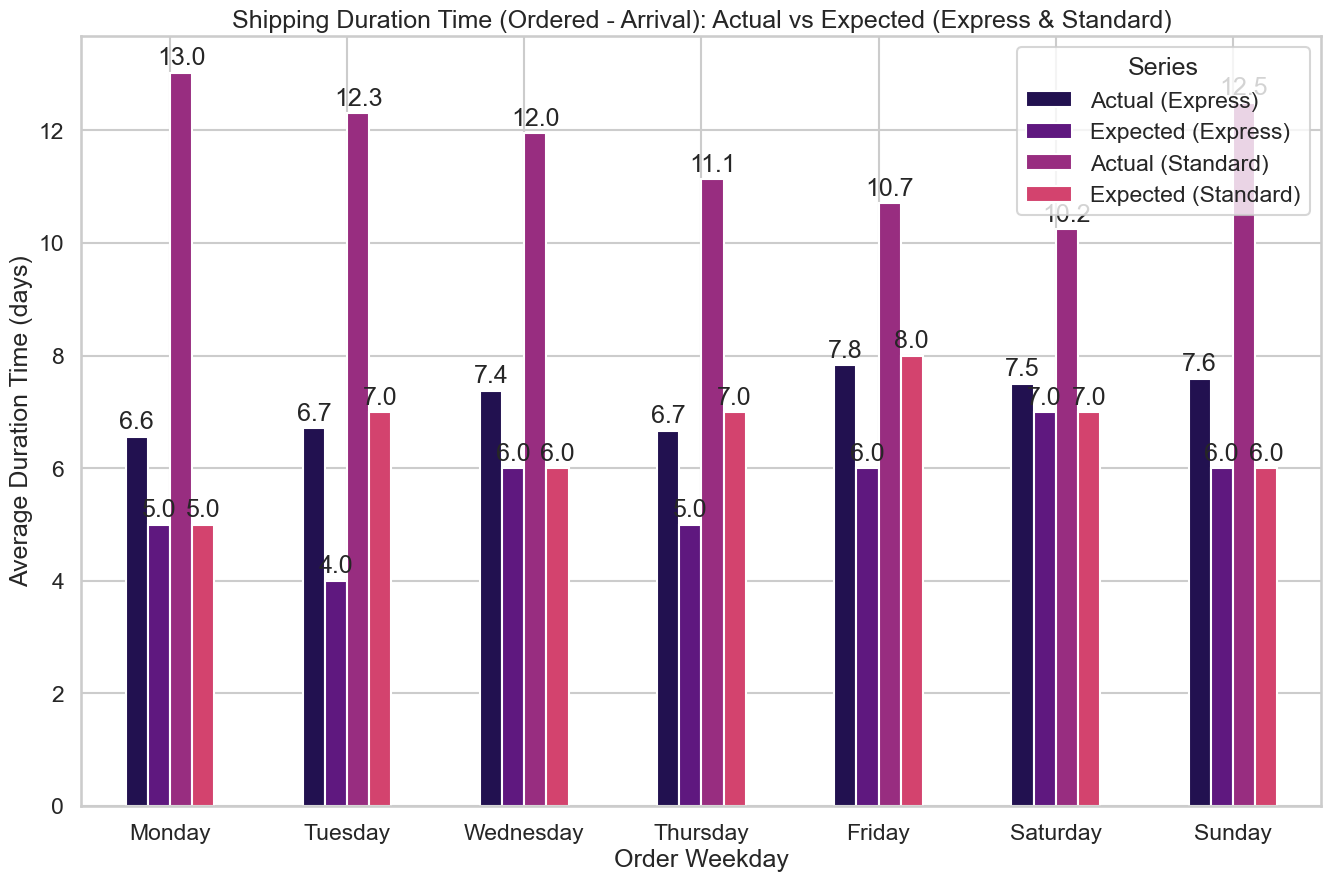

In [146]:

# --- Express actual ---
actual_exp = (
    merged_metric_2[merged_metric_2["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# --- Express expected ---
expected_exp = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "Expected (Express)": [5,4,6,5,6,7,6]
}
expected_exp_df = pd.DataFrame(expected_exp).set_index("order_weekday")

# --- Standard actual ---
actual_std = (
    merged_metric_2[merged_metric_2["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
)

# --- Standard expected ---
expected_std = {
    "order_weekday": ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    "Expected (Standard)": [5,7,6,7,8,7,6]
}
expected_std_df = pd.DataFrame(expected_std).set_index("order_weekday")

# --- Reindex all to same weekday order ---
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
actual_exp = actual_exp.reindex(weekday_order)
actual_std = actual_std.reindex(weekday_order)
expected_exp_df = expected_exp_df.reindex(weekday_order)
expected_std_df = expected_std_df.reindex(weekday_order)

# --- Combine everything into one DataFrame ---
comparison = pd.DataFrame({
    "Actual (Express)": actual_exp,
    "Expected (Express)": expected_exp_df["Expected (Express)"],
    "Actual (Standard)": actual_std,
    "Expected (Standard)": expected_std_df["Expected (Standard)"]
})

# --- Plot ---
ax = comparison.plot(kind="bar", figsize=(16,10))
plt.title("Shipping Duration Time (Ordered - Arrival): Actual vs Expected (Express & Standard)")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")
plt.xticks(rotation=0)
plt.legend(title="Series")

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=2)

plt.show()


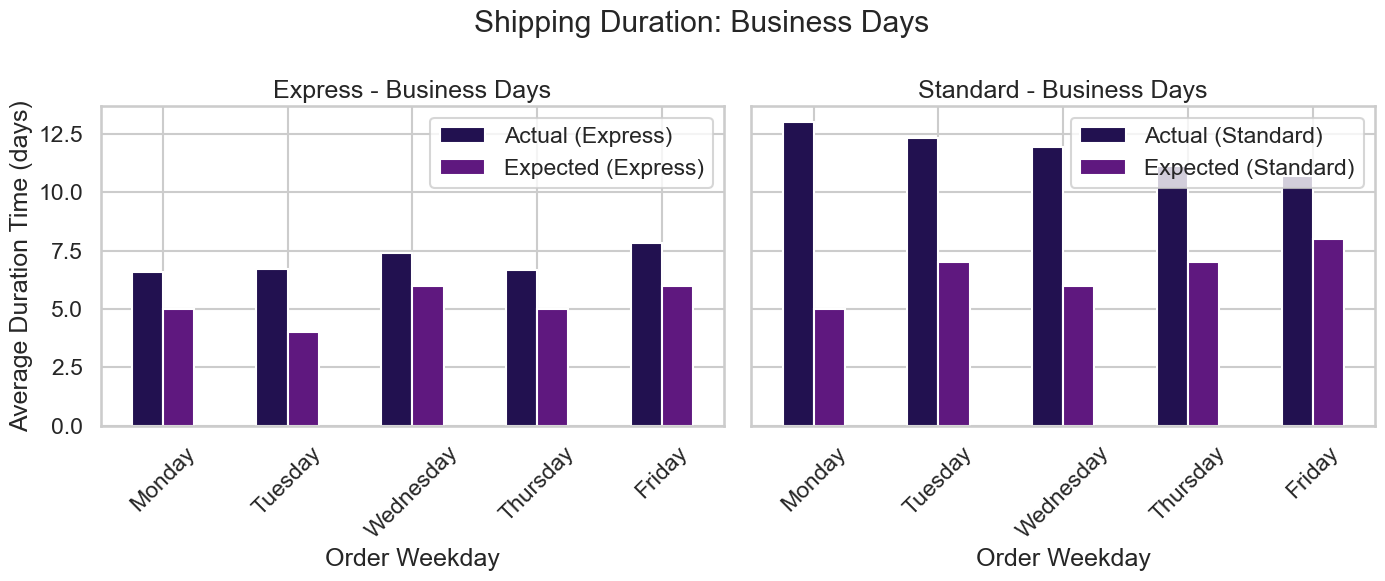

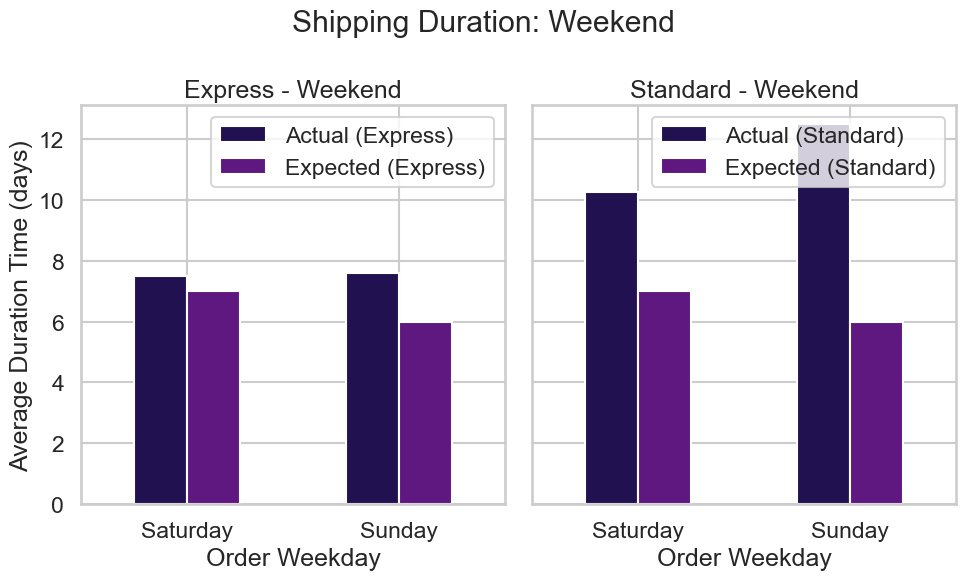

In [147]:
# weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
business_days = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekend_days = ["Saturday","Sunday"]

# --- Express ---
# actual
actual_exp = (
    merged_metric_2[merged_metric_2["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# expected
expected_exp_data = {
    "order_weekday": weekday_order,
    "expected_delay": [5,4,6,5,6,7,6]
}
expected_exp = pd.DataFrame(expected_exp_data).set_index("order_weekday").reindex(weekday_order)

# combine Express
comparison_exp = pd.DataFrame({
    "Actual (Express)": actual_exp,
    "Expected (Express)": expected_exp["expected_delay"]
})

# --- Standard ---
# actual
actual_std = (
    merged_metric_2[merged_metric_2["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

# expected
expected_std_data = {
    "order_weekday": weekday_order,
    "expected_delay": [5,7,6,7,8,7,6]
}
expected_std = pd.DataFrame(expected_std_data).set_index("order_weekday").reindex(weekday_order)

# combine Standard
comparison_std = pd.DataFrame({
    "Actual (Standard)": actual_std,
    "Expected (Standard)": expected_std["expected_delay"]
})

# --- Split by business days & weekend ---
comparison_exp_business = comparison_exp.loc[business_days]
comparison_exp_weekend = comparison_exp.loc[weekend_days]

comparison_std_business = comparison_std.loc[business_days]
comparison_std_weekend = comparison_std.loc[weekend_days]

# --- Plot business days ---
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

comparison_exp_business.plot(kind="bar", ax=axes[0])
axes[0].set_title("Express - Business Days")
axes[0].set_ylabel("Average Duration Time (days)")
axes[0].set_xlabel("Order Weekday")
axes[0].set_xticklabels(comparison_exp_business.index, rotation=45)

comparison_std_business.plot(kind="bar", ax=axes[1])
axes[1].set_title("Standard - Business Days")
axes[1].set_xlabel("Order Weekday")
axes[1].set_xticklabels(comparison_std_business.index, rotation=45)

plt.suptitle("Shipping Duration: Business Days")
plt.tight_layout()
plt.show()

# --- Plot weekends ---
fig, axes = plt.subplots(1, 2, figsize=(10,6), sharey=True)

comparison_exp_weekend.plot(kind="bar", ax=axes[0])
axes[0].set_title("Express - Weekend")
axes[0].set_ylabel("Average Duration Time (days)")
axes[0].set_xlabel("Order Weekday")
axes[0].set_xticklabels(comparison_exp_weekend.index, rotation=0)

comparison_std_weekend.plot(kind="bar", ax=axes[1])
axes[1].set_title("Standard - Weekend")
axes[1].set_xlabel("Order Weekday")
axes[1].set_xticklabels(comparison_std_weekend.index, rotation=0)

plt.suptitle("Shipping Duration: Weekend")
plt.tight_layout()
plt.show()


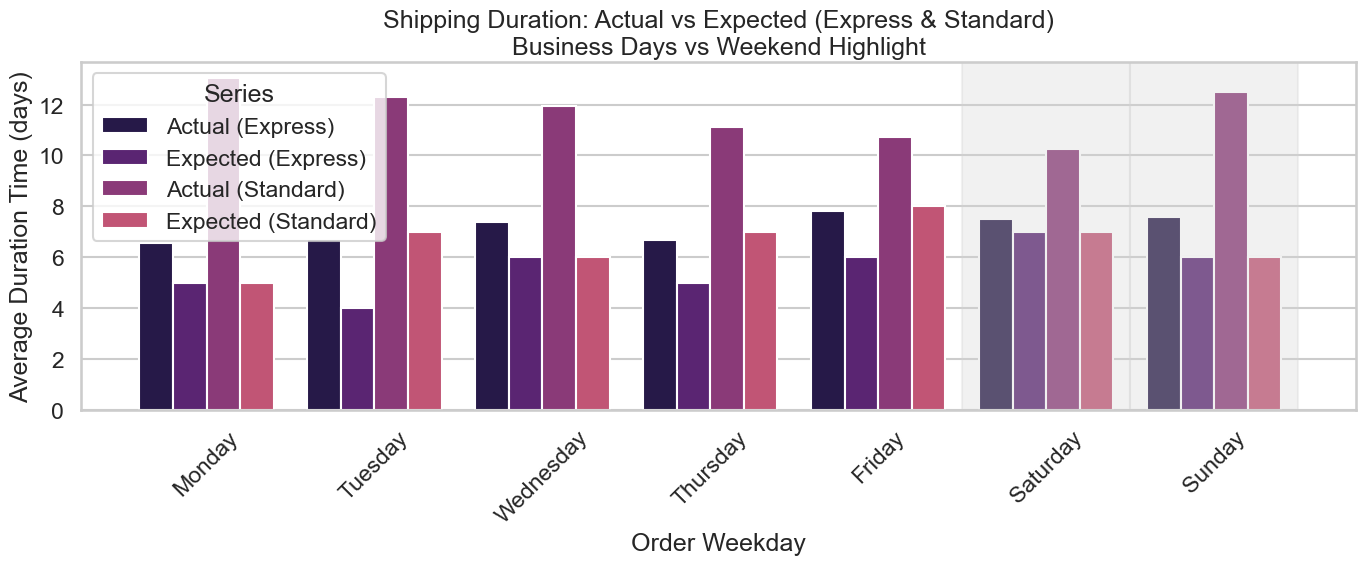

In [148]:
# weekday order + categories
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
business_days = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekend_days = ["Saturday","Sunday"]

# --- Express ---
actual_exp = (
    merged_metric_2[merged_metric_2["ship mode"]=="Express"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

expected_exp = pd.Series([5,4,6,5,6,7,6], index=weekday_order, name="Expected (Express)")

# --- Standard ---
actual_std = (
    merged_metric_2[merged_metric_2["ship mode"]=="Standard"]
    .groupby("order_weekday")["date_diff_days"]
    .mean()
    .reindex(weekday_order)
)

expected_std = pd.Series([5,7,6,7,8,7,6], index=weekday_order, name="Expected (Standard)")

# --- Combine into one long-format DataFrame ---
df_long = pd.DataFrame({
    "Actual (Express)": actual_exp,
    "Expected (Express)": expected_exp,
    "Actual (Standard)": actual_std,
    "Expected (Standard)": expected_std
}).reset_index().melt(id_vars="index", var_name="Type", value_name="Delay")

df_long.rename(columns={"index": "OrderWeekday"}, inplace=True)

# Add business/weekend label
df_long["DayType"] = df_long["OrderWeekday"].apply(lambda x: "Business" if x in business_days else "Weekend")

# --- Seaborn plot ---
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_long,
    x="OrderWeekday", y="Delay", hue="Type",
    order=weekday_order
)

plt.title("Shipping Duration: Actual vs Expected (Express & Standard)\nBusiness Days vs Weekend Highlight")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")

# Highlight weekends with background shading
for i, day in enumerate(weekday_order):
    if day in weekend_days:
        plt.axvspan(i-0.5, i+0.5, color="lightgrey", alpha=0.3)

plt.legend(title="Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


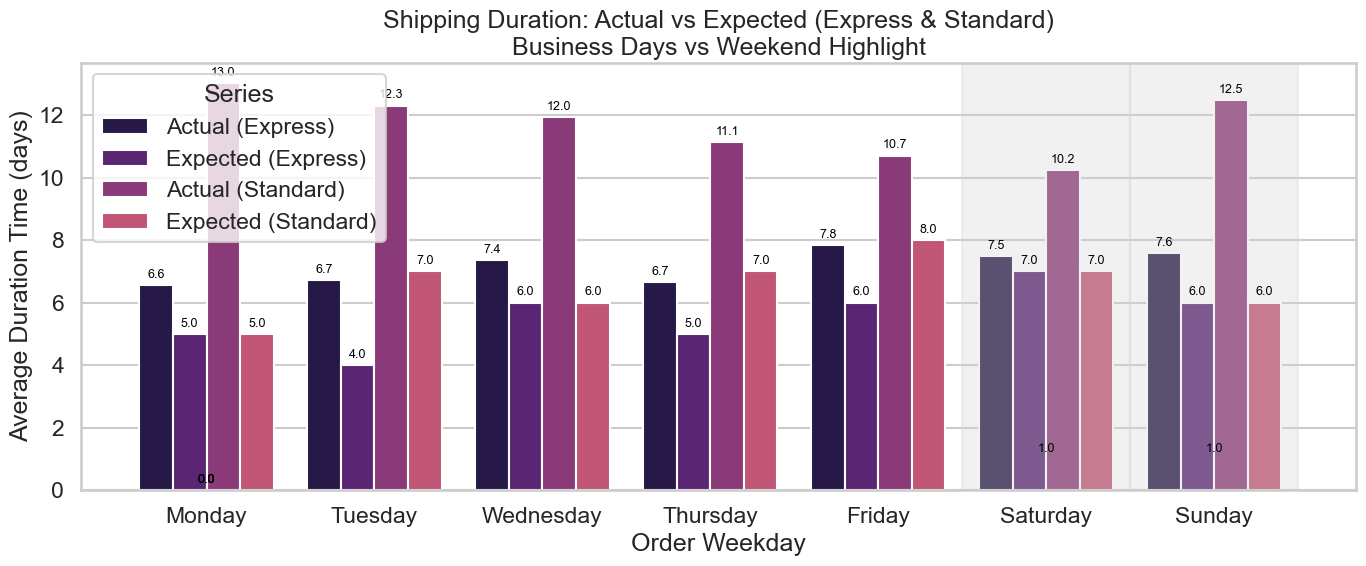

In [149]:
# --- Seaborn plot ---
plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=df_long,
    x="OrderWeekday", y="Delay", hue="Type",
    order=weekday_order
)

plt.title("Shipping Duration: Actual vs Expected (Express & Standard)\nBusiness Days vs Weekend Highlight")
plt.ylabel("Average Duration Time (days)")
plt.xlabel("Order Weekday")

# Highlight weekends with background shading
for i, day in enumerate(weekday_order):
    if day in weekend_days:
        plt.axvspan(i-0.5, i+0.5, color="lightgrey", alpha=0.3)

# --- Add value labels ---
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}",                       # 1 decimal place
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=9, color="black", xytext=(0, 3), textcoords='offset points'
    )

plt.legend(title="Series")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### o_processed_2_delivered

#### Data

In [150]:
df_processed_x_delivered = df_campaign_cleaned.merge(df_interndata_cleaned, on="order id",how="inner")
df_processed_x_delivered

,order id,arrival scan date,ready to ship date
0,CA-2019-129630,2019-09-09,2019-09-04
1,CA-2019-129847,2019-09-10,2019-09-04
2,CA-2019-106278,2019-09-10,2019-09-05
3,CA-2019-158099,2019-09-11,2019-09-05
4,CA-2019-123120,2019-09-16,2019-09-09
5,CA-2019-149783,2019-09-16,2019-09-09
6,CA-2019-102981,2019-09-16,2019-09-09
7,CA-2019-110023,2019-09-16,2019-09-11
8,CA-2019-133123,2019-09-16,2019-09-11
9,CA-2019-149223,2019-09-17,2019-09-11


#### Plots

In [151]:
#not enough data